# Exploratory data analysis

>**The purpose of exploratory data analysis is to generate insights that can generate business value and 
Inform our model decisions**.

**Exploratory Data Analysis** serves as a crucial preliminary step to uncover insights beyond formal modeling or hypothesis testing tasks. It offers a comprehensive understanding of dataset variables and their interrelationships. 

EDA typically involves:
- Univariate Analysis: Examining individual variables to understand their distributions and characteristics.
- Bivariate Analysis: Investigating the relationships between pairs of variables, such as correlation or association.
- Multivariate Analysis: Exploring relationships between multiple variables simultaneously, often using techniques like clustering.

### A Systematic Approach to Insight Generation

After examining individual variables and their relationships, the next step is to generate valuable insights in a systematic manner. This process involves:

1. **Formulating a Hypothesis or Question**: Begin by proposing a hypothesis or framing a question relevant to the dataset.

2. **Conducting Exploratory Data Analysis (EDA)**: Utilize EDA techniques to test the hypothesis or answer the question. This may involve univariate, bivariate, and multivariate analyses to uncover patterns, trends, and correlations within the data.

3. **Deriving General Insights**: Based on the findings from EDA, distill the observations into general insights that provide meaningful understanding and actionable conclusions.



>Here we go with proposeing some intersting questions like:
- [Which are the top restaurant chains in Bangalore?](#question1)
- [How many of the restuarants do not accept online orders?](#question2) 
- [What is the ratio of restaurants that provide and do not provide table booking?](#question3)
- [Rating distribution?](#question4)
- [Cost vs rating?](#question5)
- [Distribution of cost for two people?](#question6)
- [Is there any difference between votes of restaurants accepting and not accepting online orders Interms of procing stratigies?](#question7)
- [Is there any difference between votes of restaurants accepting and not accepting online orders interms of ratings?](#question77)
- [Which are the most common restaurant type in a particualr city?](#question8)
- [Analyzing Dominant and Emerging Restaurant Types: Uncovering Market Leaders and Exploring Growth Opportunities....](#question5757)
- [Cost factor?](#question9)
- [Finding Best budget Restaurants in any location?](#question10)
- [Which are the foodie areas?](#question11)
<p>We Will try to tackel them one by one here...............</p>

In [1]:
# Importing our dependencices
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore ,spearmanr
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [2]:
data = pd.read_csv("Restaurants.csv")
data.head()

,name,address,location,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),menu_variety,duplicate_count,has_menu,votes_bins,cuisines_weights,rest_type_market_share
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...",Bellandur,No,No,3.4,7.0,Quick Bites,['Fast Food'],200.0,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur,0,2,0,Low,2119.0,40.386931
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR",HSR,Yes,No,3.9,48.0,Quick Bites,"['Fast Food', ' Beverages']",400.0,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM,0,9,0,Medium,3246.0,40.386931
2,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...",Electronic City,No,No,3.7,0.0,Casual Dining,"['Continental', ' Chinese', ' Italian']",700.0,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City,0,3,0,NoVotes,5091.0,17.981858
3,#refuel,"7, Ground Floor, RR Commercial Complex, Akshay...",Bannerghatta Road,Yes,No,3.7,37.0,Cafe,"['Cafe', ' Beverages']",400.0,"[('Rated 3.0', 'RATED\n We ordered for Schezw...","['Kit Kat Thick Shake', 'Ferrero Rocher Thick ...",Cafes,Bannerghatta Road,145,3,1,Medium,1890.0,4.455326
4,'Brahmins' Thatte Idli,"19, 1st main, 2nd cross, 3rd stage, 3rd block,...",Basaveshwara Nagar,Yes,No,3.7,0.0,Quick Bites,['South Indian'],100.0,[],"['Masala Dosa', 'Set Dosa', 'Shavige Bhath', '...",Dine-out,Rajajinagar,16,1,1,NoVotes,2376.0,40.386931


---

# Univariate Analysis

In [3]:
categorical_features_1 = data.select_dtypes('object').columns
numeric_features_1 = data.select_dtypes(include=['float64', 'int64']).columns
print("We have {} Numerical Features: {}".format(len(numeric_features_1), numeric_features_1))
print("We have {} Categorical Features: {}".format(len(categorical_features_1), categorical_features_1))

We have 8 Numerical Features: Index(['rate', 'votes', 'approx_cost(for two people)', 'menu_variety',
       'duplicate_count', 'has_menu', 'cuisines_weights',
       'rest_type_market_share'],
      dtype='object')
We have 12 Categorical Features: Index(['name', 'address', 'location', 'online_order', 'book_table',
       'rest_type', 'cuisines', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)', 'votes_bins'],
      dtype='object')


In [4]:
# Filter out 'has_menu' from numerical features
numeric_features_1 = [feature for feature in numeric_features_1 if feature != 'has_menu']

In [5]:
data.describe()

,rate,votes,approx_cost(for two people),menu_variety,duplicate_count,has_menu,cuisines_weights,rest_type_market_share
count,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000
mean,3.633451,182.634498,398.151824,18.085895,4.131492,0.184394,4745.779722,21.071213
std,0.384038,596.281433,179.491140,51.172602,3.370370,0.387821,3518.402639,16.777548
min,1.800000,0.000000,40.000000,0.000000,1.000000,0.000000,0.000000,0.008028
25%,3.400000,4.000000,250.000000,0.000000,2.000000,0.000000,1991.000000,4.543630
50%,3.700000,24.800000,400.000000,0.000000,3.000000,0.000000,3719.000000,17.981858
75%,3.833333,121.500000,500.000000,0.000000,5.000000,0.000000,7503.000000,40.386931
max,4.900000,16588.500000,950.000000,709.000000,34.000000,1.000000,16542.000000,40.386931


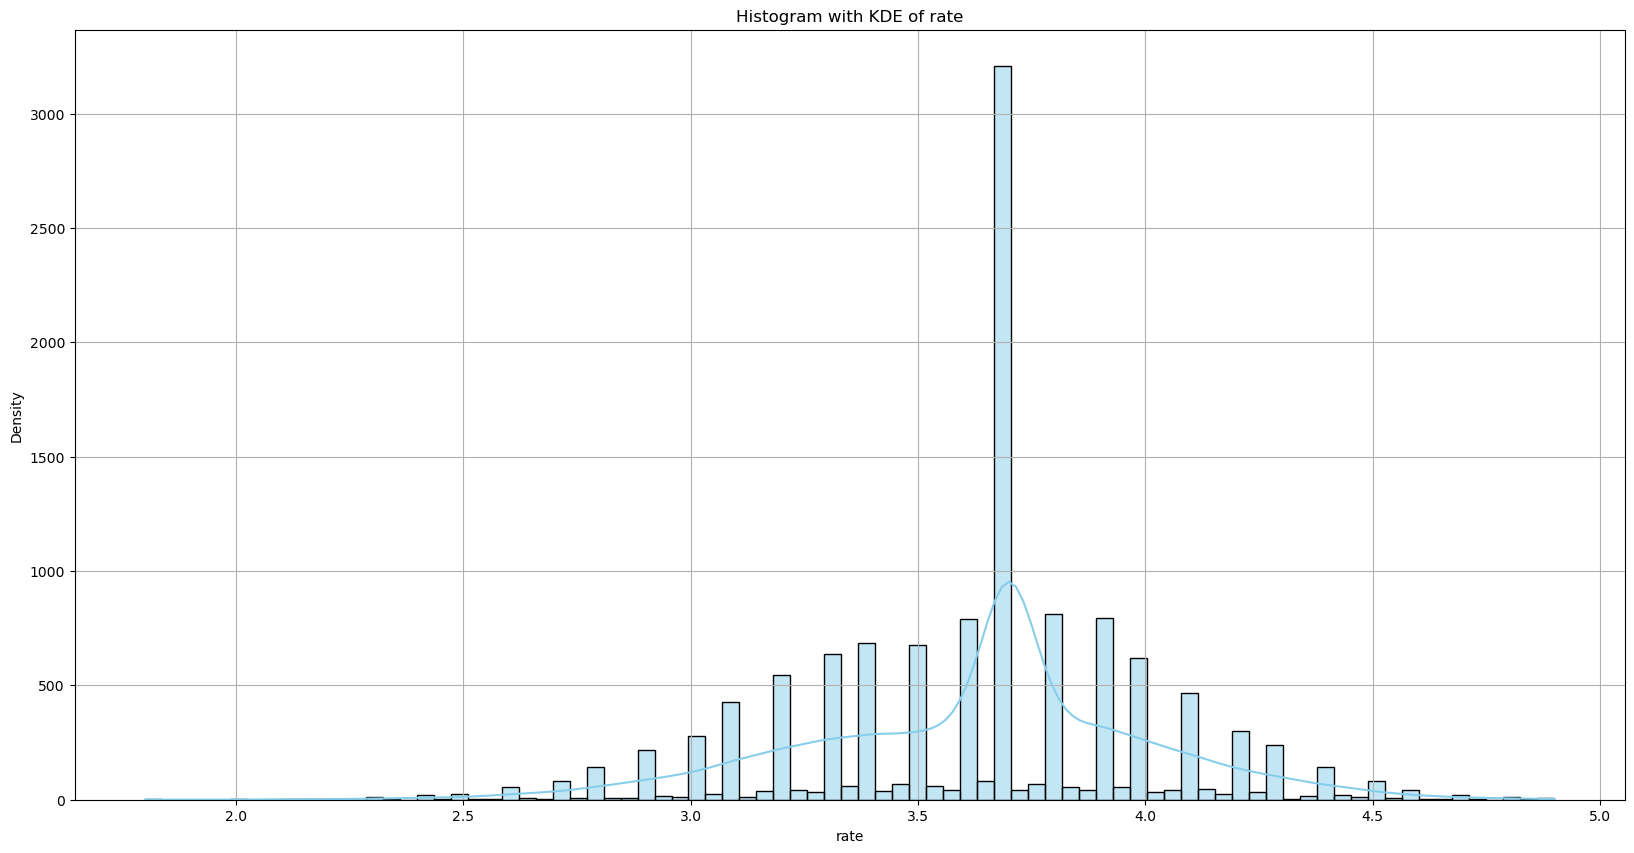

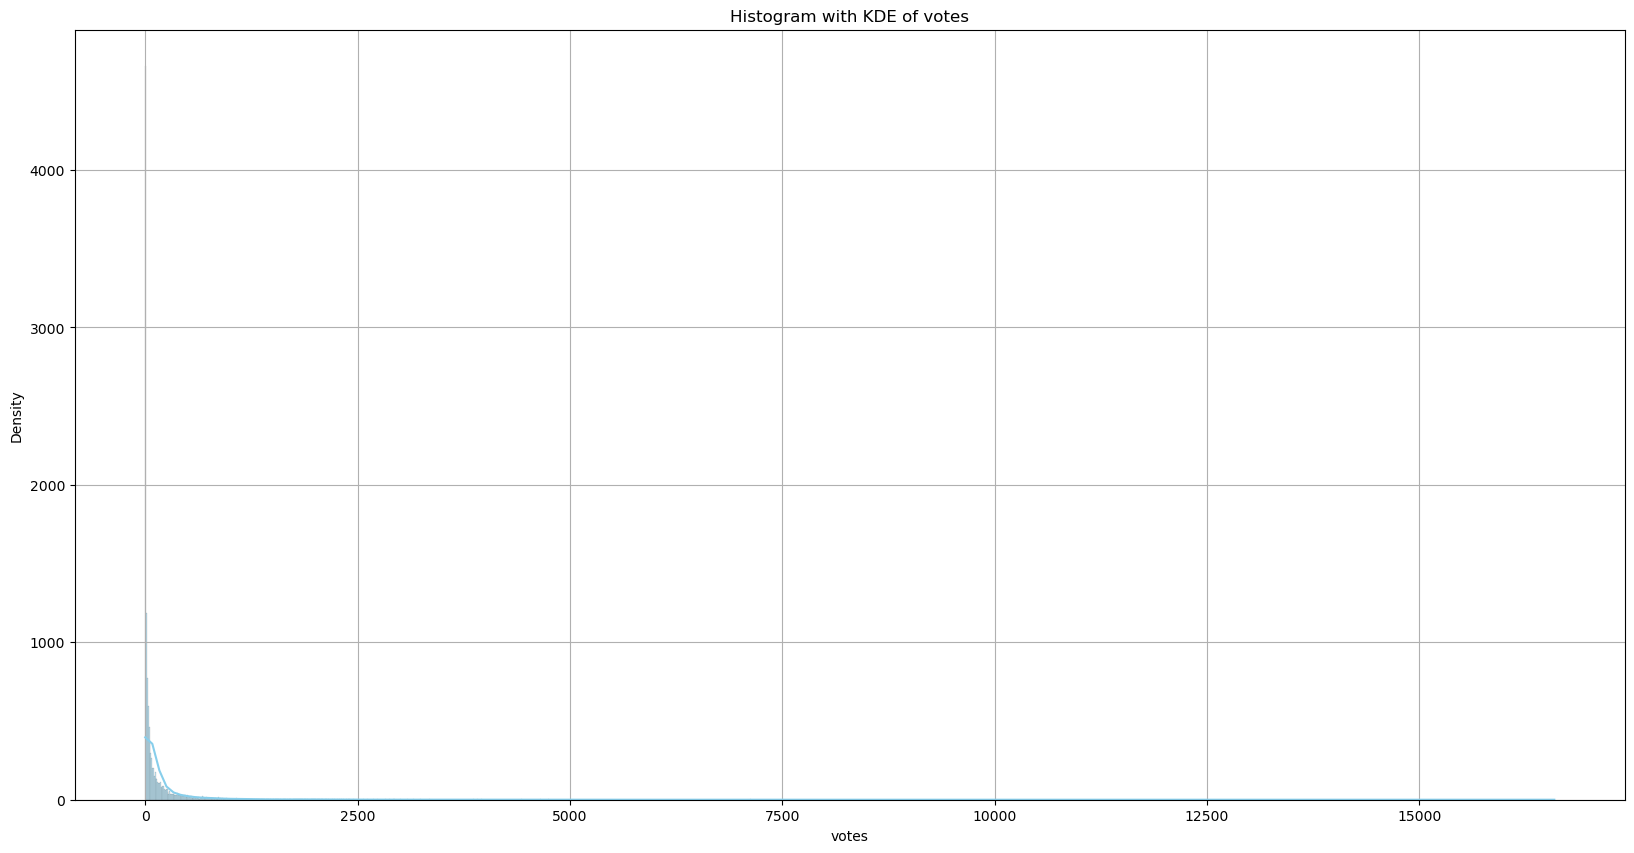

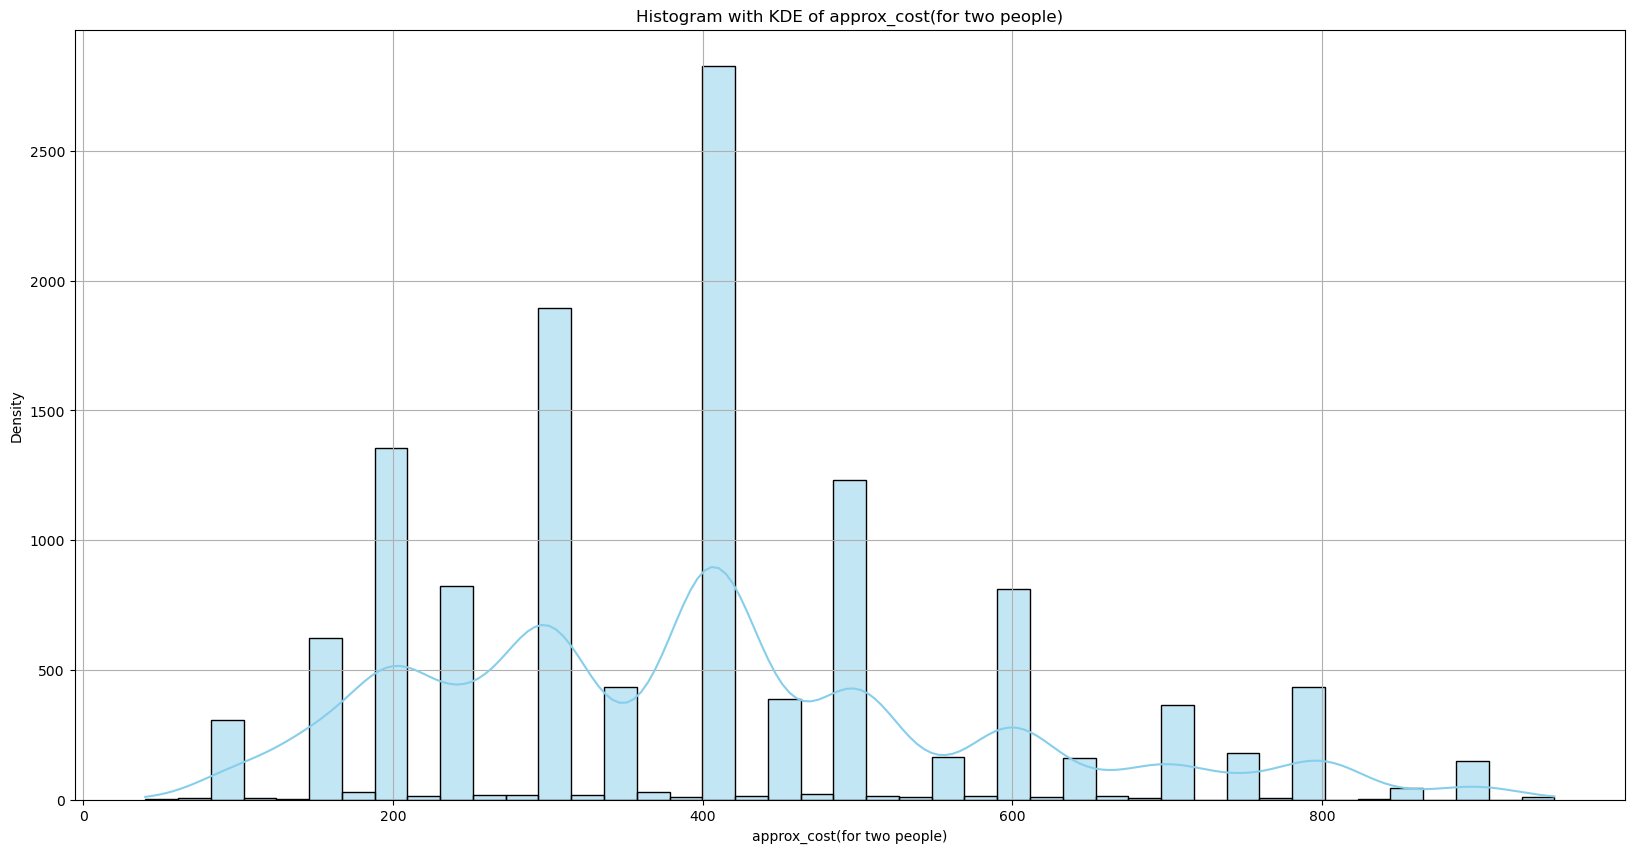

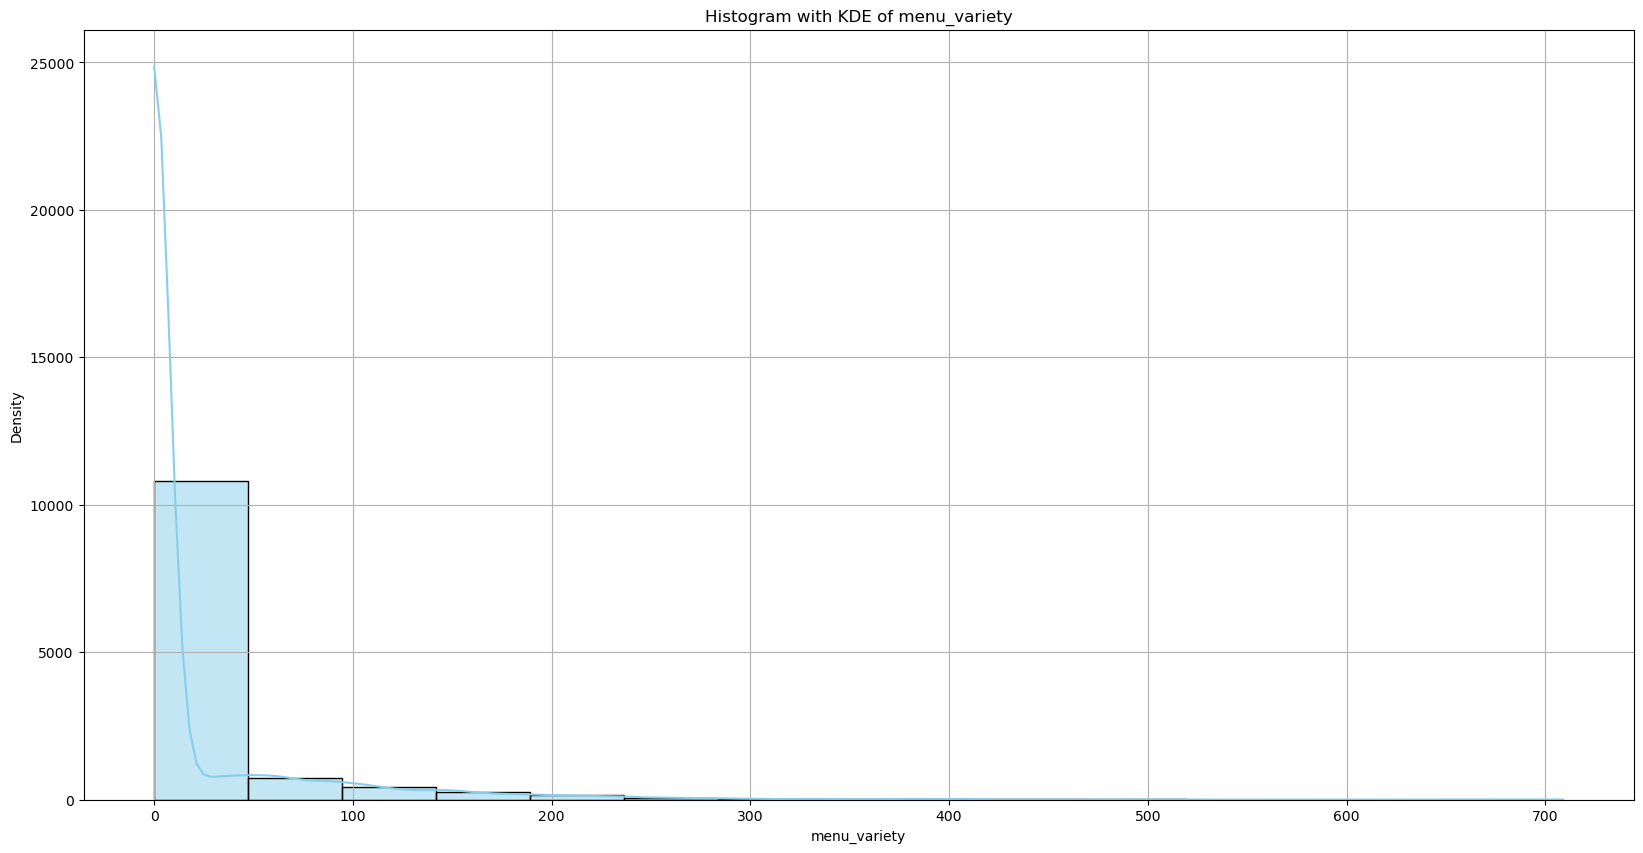

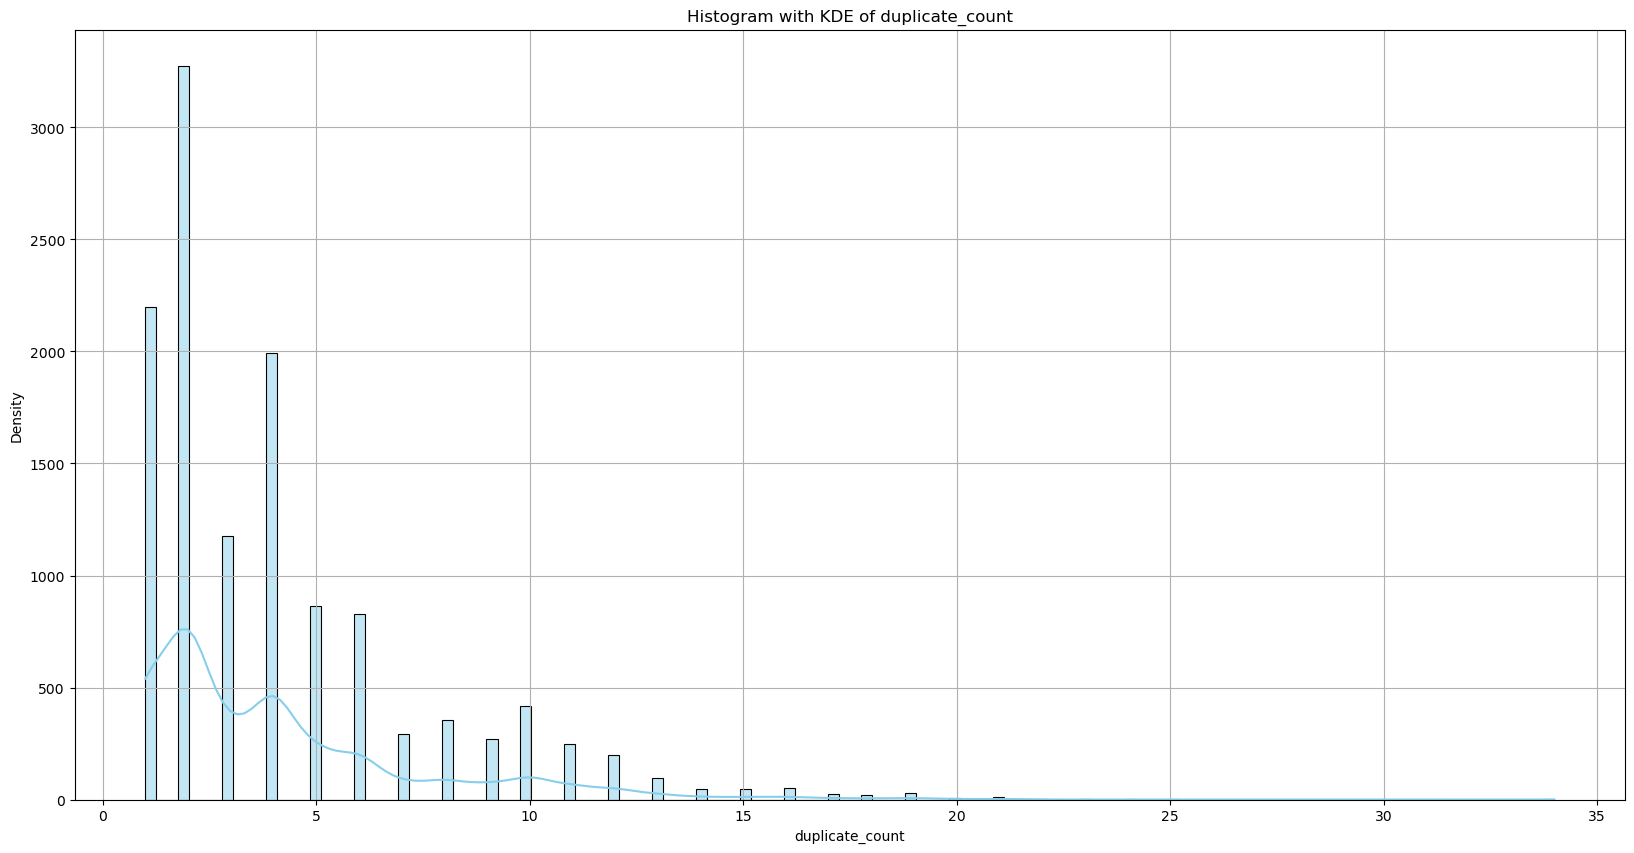

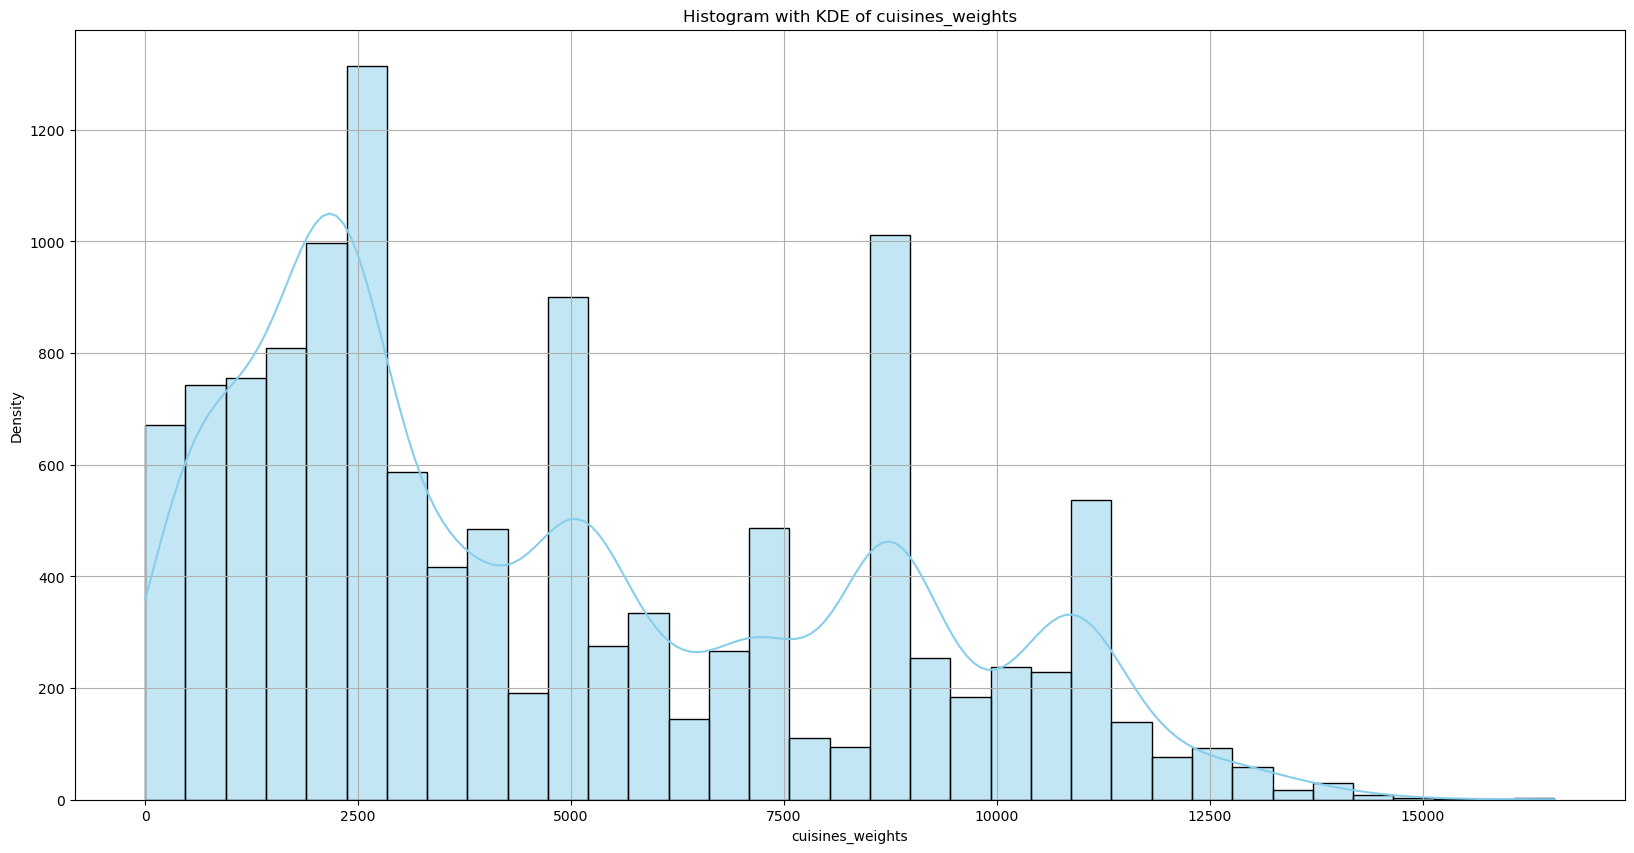

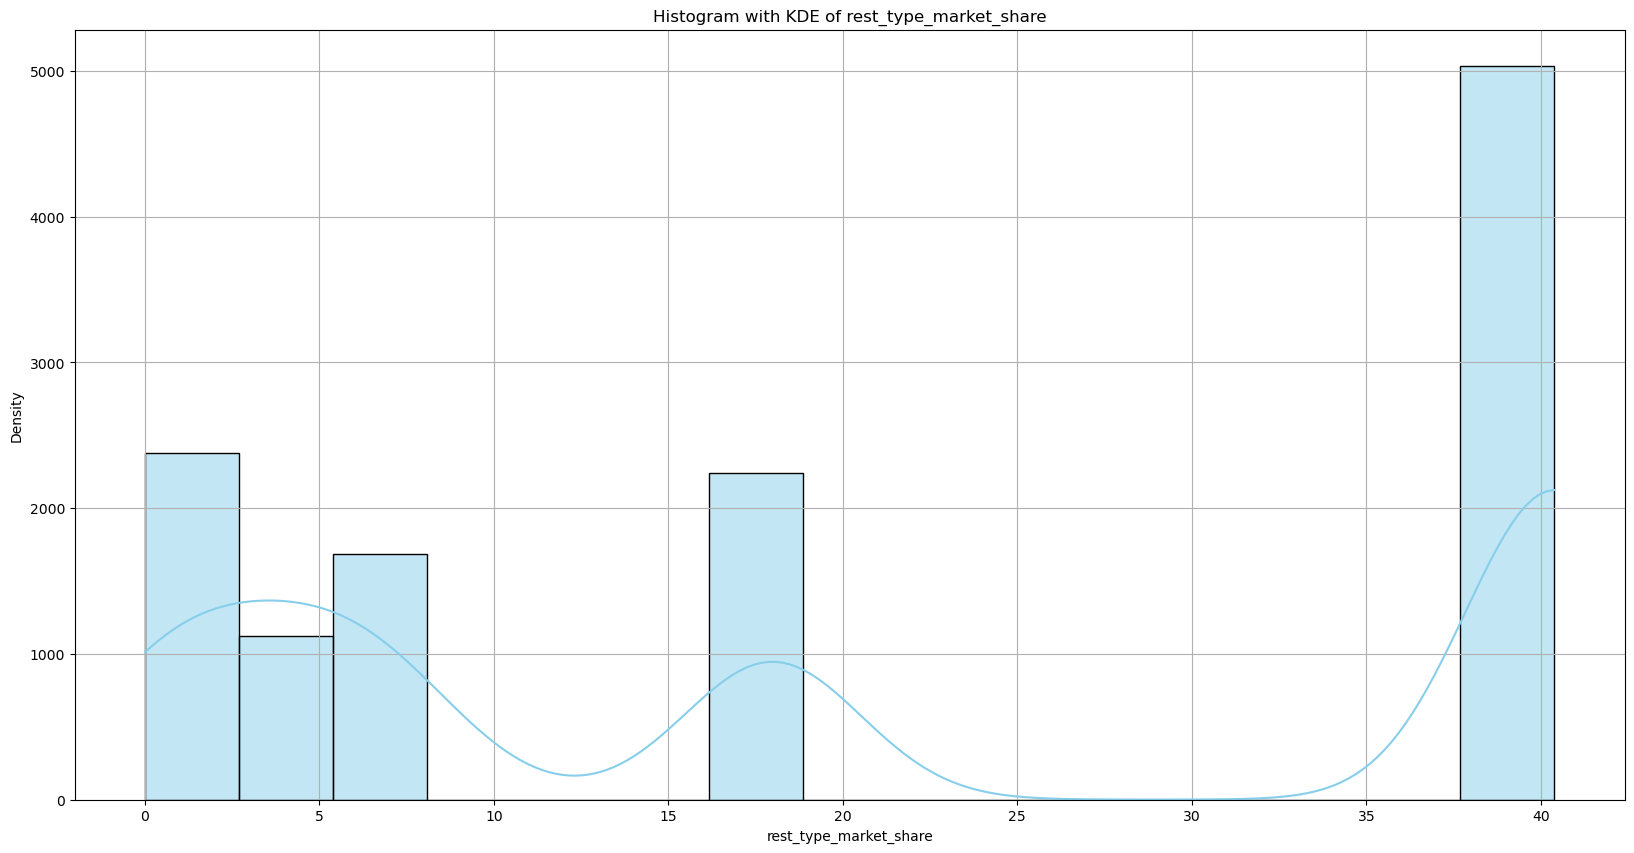

In [6]:
# Plot histograms with KDE for each feature
for feature in numeric_features_1:
    plt.figure(figsize=(20, 10))
    sns.histplot(data[feature], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram with KDE of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


#### When it comes to our `rate` feature:
- The distribution shows that rates are unimodal and positively skewed, with a peak around 3.1. This skewed shape is consistent with the summary statistics, where the mean rate (3.63) is higher than the median rate (3.7).
- The median rate is 3.7, while the 25th and 75th percentiles are 3.4 and 3.83, respectively. This indicates that the central tendency of rates is concentrated around the mid-to-high 3 range, with a significant portion of rates falling between 3.4 and 3.83.
-  The minimum rate is 1.8, and the maximum rate is 4.9. This suggests that the rates are likely based on a scale ranging from 1 to 5, with very few rates falling below 2 or above 4.9.
- **Potential Improvements**: Depending on the context and intended use of the rates, it may be worthwhile to explore approaches to normalize the distribution, handle outliers, or apply transformations to better meet the assumptions of statistical analyses or modeling techniques.
#### When it comes to our `votes` feature:
- Heavy-tailed distribution: The distribution has a very long tail extending towards the higher values of "votes". This indicates the presence of outliers or extreme values in the data, where some restaurants have significantly more votes compared to the majority.
- Peak near zero: The histogram shows a peak around zero, suggesting that a large number of restaurants have very few or no votes.
- Sparse data: Apart from the peak near zero and the long tail, the histogram is relatively sparse, implying that there are fewer observations in the mid-range of the "votes" distribution.
- Lack of normality: The heavily skewed shape of the distribution deviates significantly from a normal distribution, which typically has a symmetric bell-curve shape.
- Potential data issues: The presence of extreme outliers and the sparse nature of the distribution could indicate potential data quality issues, such as incorrect or unreliable vote counts for some restaurants.
- **Potential Improvements**: Need for data transformation and robust methods If our goal is to perform statistical analyses or modeling involving the "votes" variable, data transformations like logarithmic or Box-Cox or other robust methods that can handle skewed distributions and outliers may be required.
#### When it comes to our `approx_cost(for two people)` feature:
- Multimodal distribution: The histogram shows multiple peaks or modes, suggesting that the cost data may be clustered around certain values or price points. This could be due to factors such as menu pricing strategies, restaurant categories, or regional differences.
- Irregular shape: The distribution has an irregular shape, with peaks and valleys of varying heights and widths. This indicates that the cost data may not follow a typical theoretical distribution, such as normal or exponential.
- Wide range: According to the summary statistics, the minimum cost is $40, and the maximum cost is $950, indicating a wide range of pricing for two people across the restaurants.
- Positive skewness: While the histogram shows multiple modes, the distribution appears to be positively skewed, with a longer tail towards higher cost values. This is consistent with the mean cost ($398.15) being higher than the median cost ($400).
- Central tendency: The median cost ($400) and the 25th and 75th percentiles ($250 and $500, respectively) suggest that a significant portion of the restaurants fall within a moderate cost range for two people as expected.
- High variability: The standard deviation of $179.49 indicates a relatively high variability in the cost data, reflecting the diverse pricing strategies or categories of restaurants included in the dataset.
#### When it comes to our `menu_variety` feature we have craeted from earlier:
- Highly skewed distribution: The distribution is positively skewed, with a large peak near zero and a long tail extending towards higher values of menu variety. This indicates that a significant portion of restaurants has a very low menu variety, while a smaller number of restaurants have a much higher menu variety.
- Zero or low menu variety: The peak at zero suggests that many restaurants have no menu variety or duplicate menu items.
- Wide range: According to the summary statistics, the minimum menu variety is 0, and the maximum is 709, indicating a wide range of menu variety across the restaurants in the dataset.
- Potential outliers: The long tail towards higher values of menu variety could be influenced by outliers or extreme cases of restaurants with an exceptionally large number of duplicate menu items.
- **Potential data quality issues**: The large peak at zero and the presence of outliers may indicate potential data quality issues, such as missing or incorrect menu variety information for some restaurants.
#### When it comes to our `duplicate_count` feature we have created also: 
- Heavy-tailed distribution: The distribution has a very long tail extending towards the higher values of "duplicates". This indicates the presence of outliers or extreme values in the data, where some restaurants have significantly more presence in our dataset compared to the majority of resturants.
- Potential outliers: The long tail towards higher values of duplications could be influenced by outliers or extreme cases of restaurants with an exceptionally large number of duplicate presence in our data.
- The duplication mean is 4.131 and  25% of 2  50% of 3  75% of 5 where we have a max of 34.

In [7]:
# Remove 'reviews_list' and 'menu_item' from categorical features
categorical_features_1 = [feature for feature in categorical_features_1 if feature not in ['reviews_list', 'menu_item']]

# Add 'has_menu' to categorical features
categorical_features_1.append('has_menu')

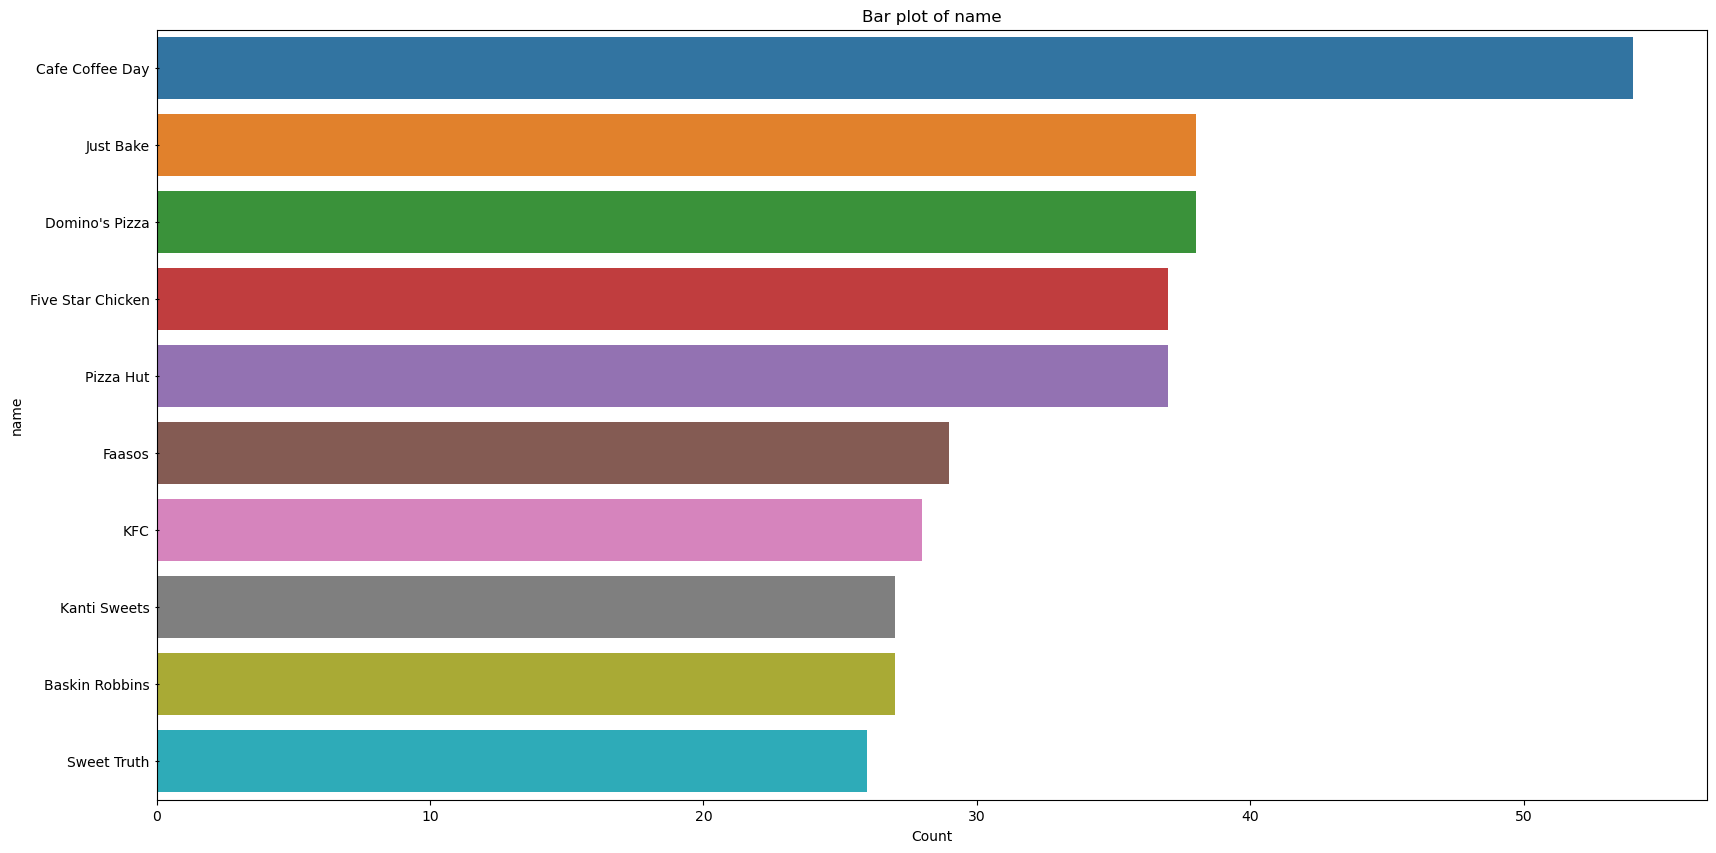

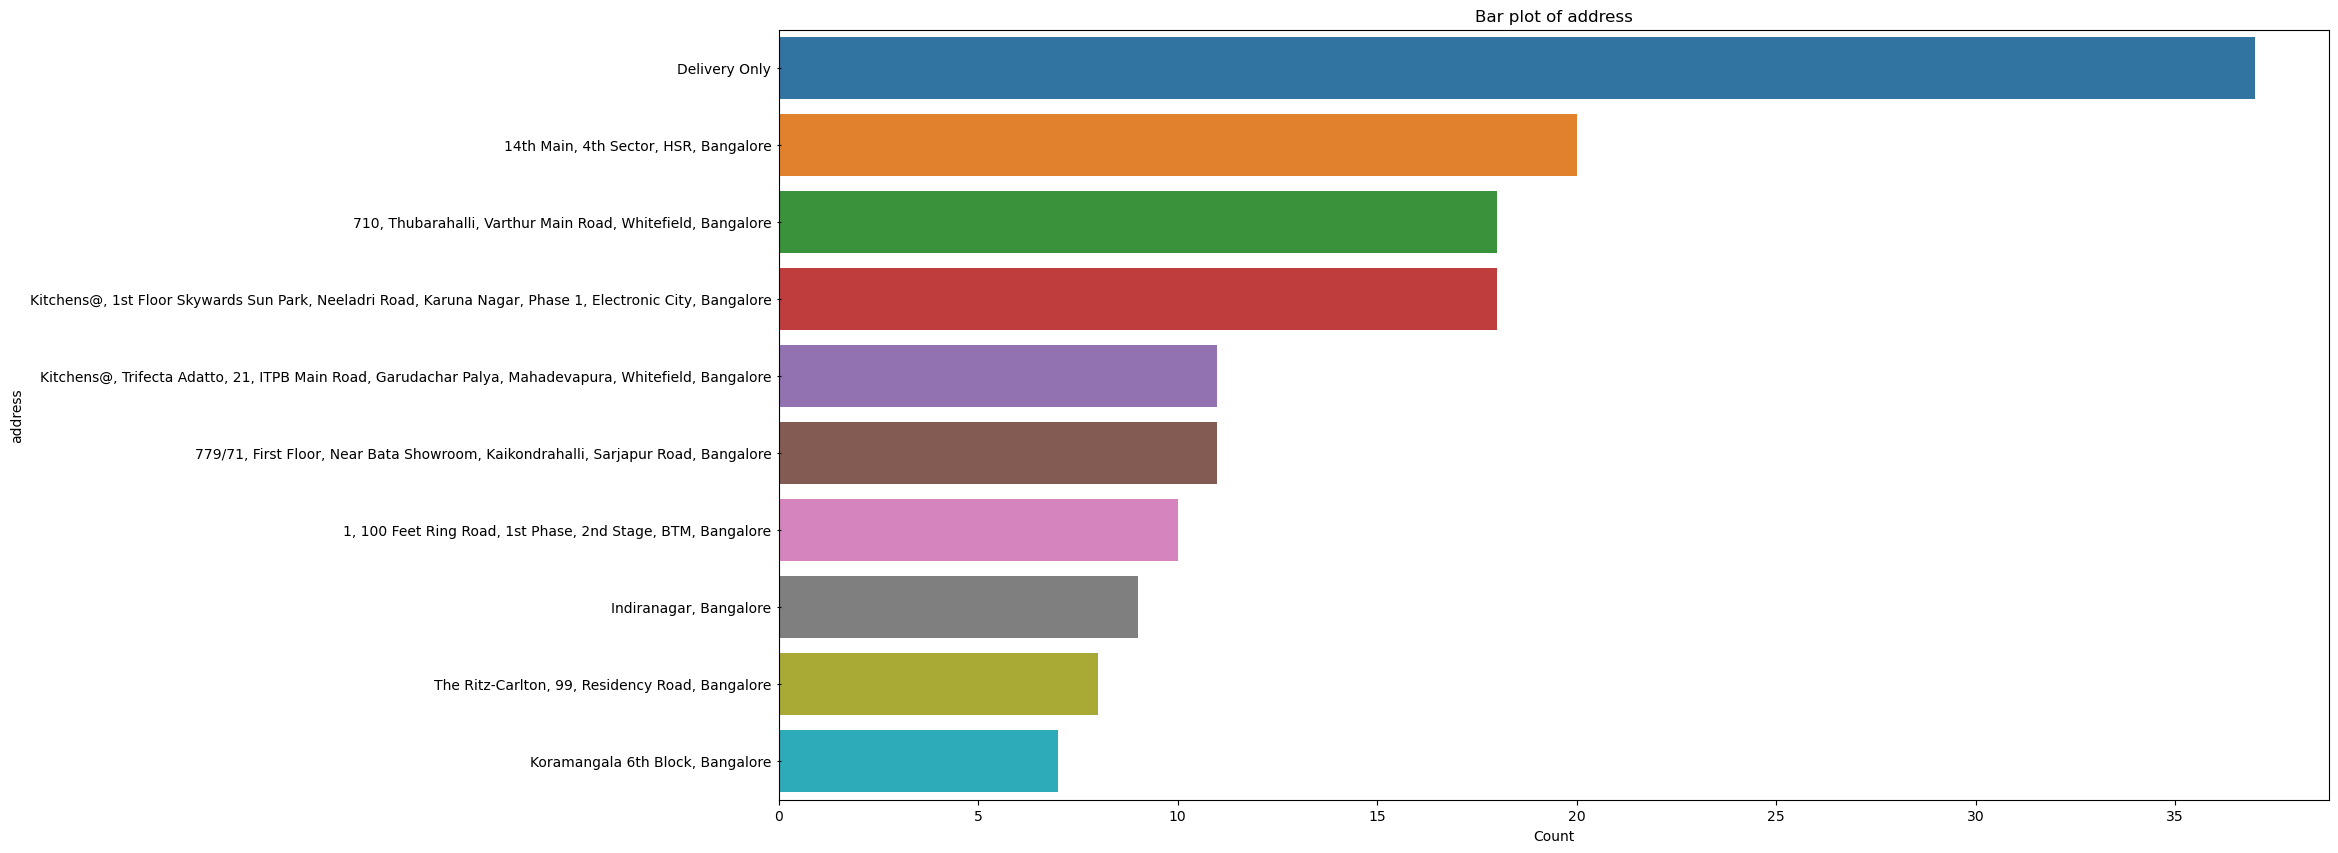

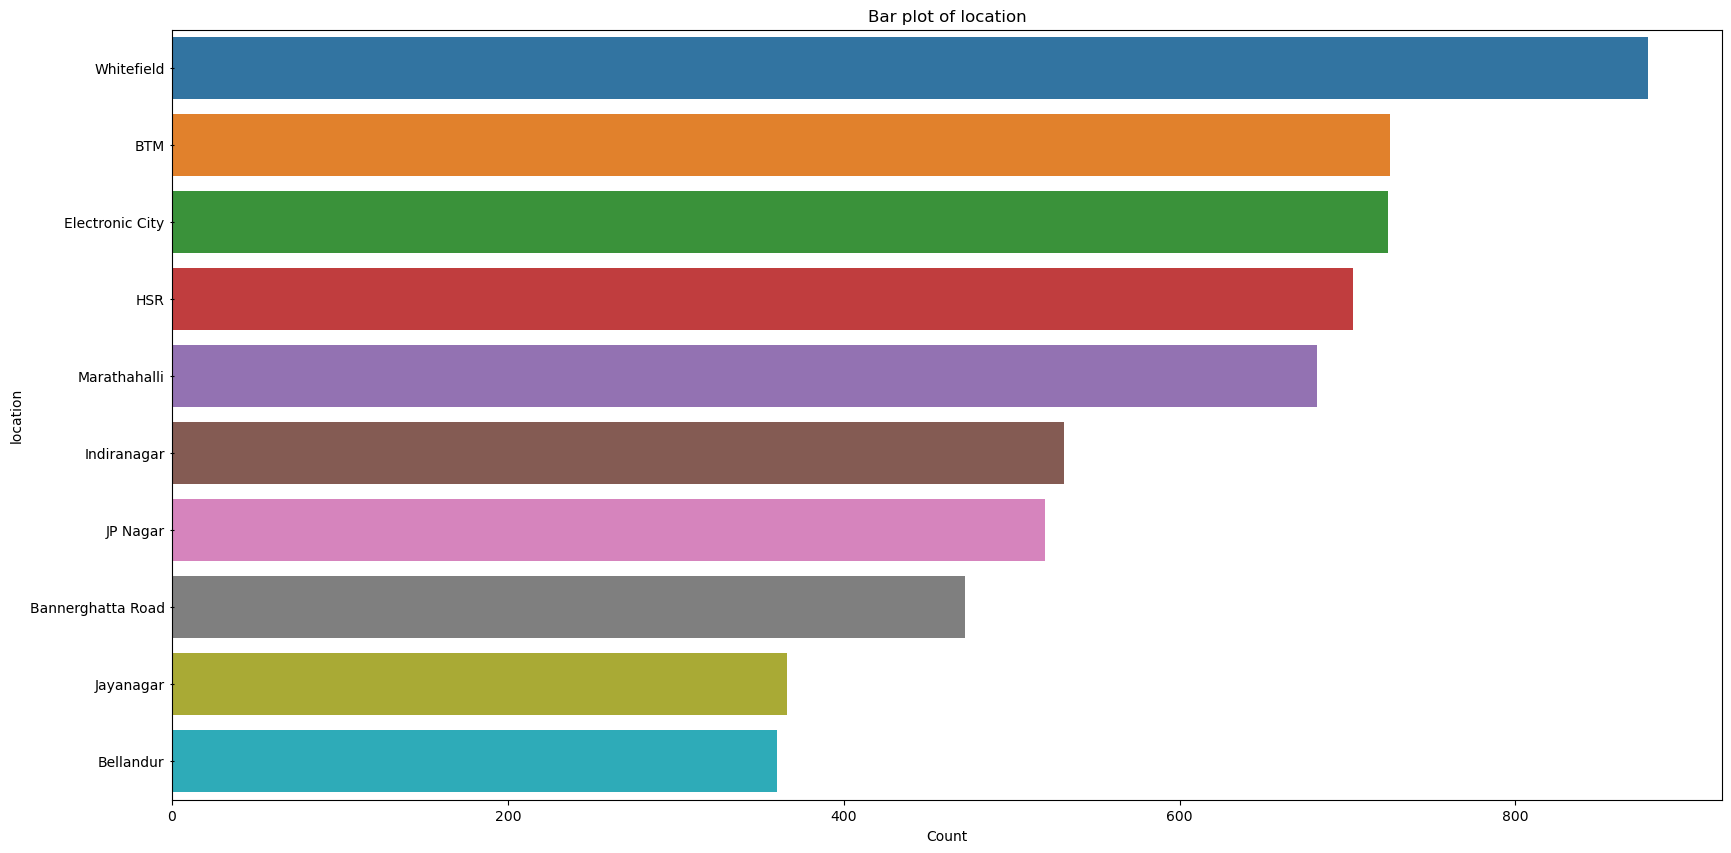

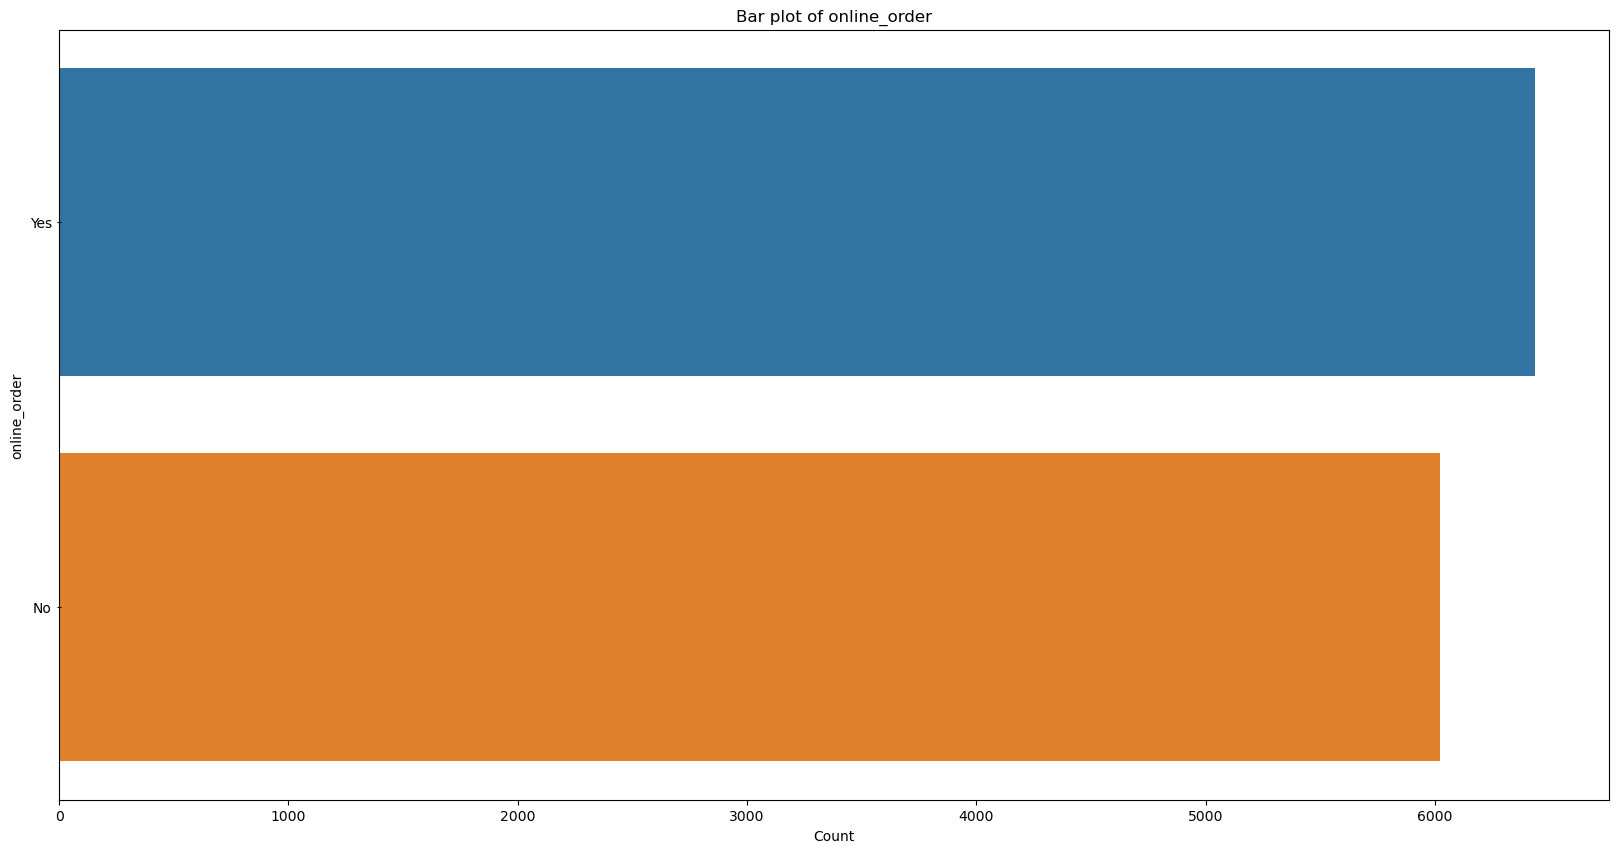

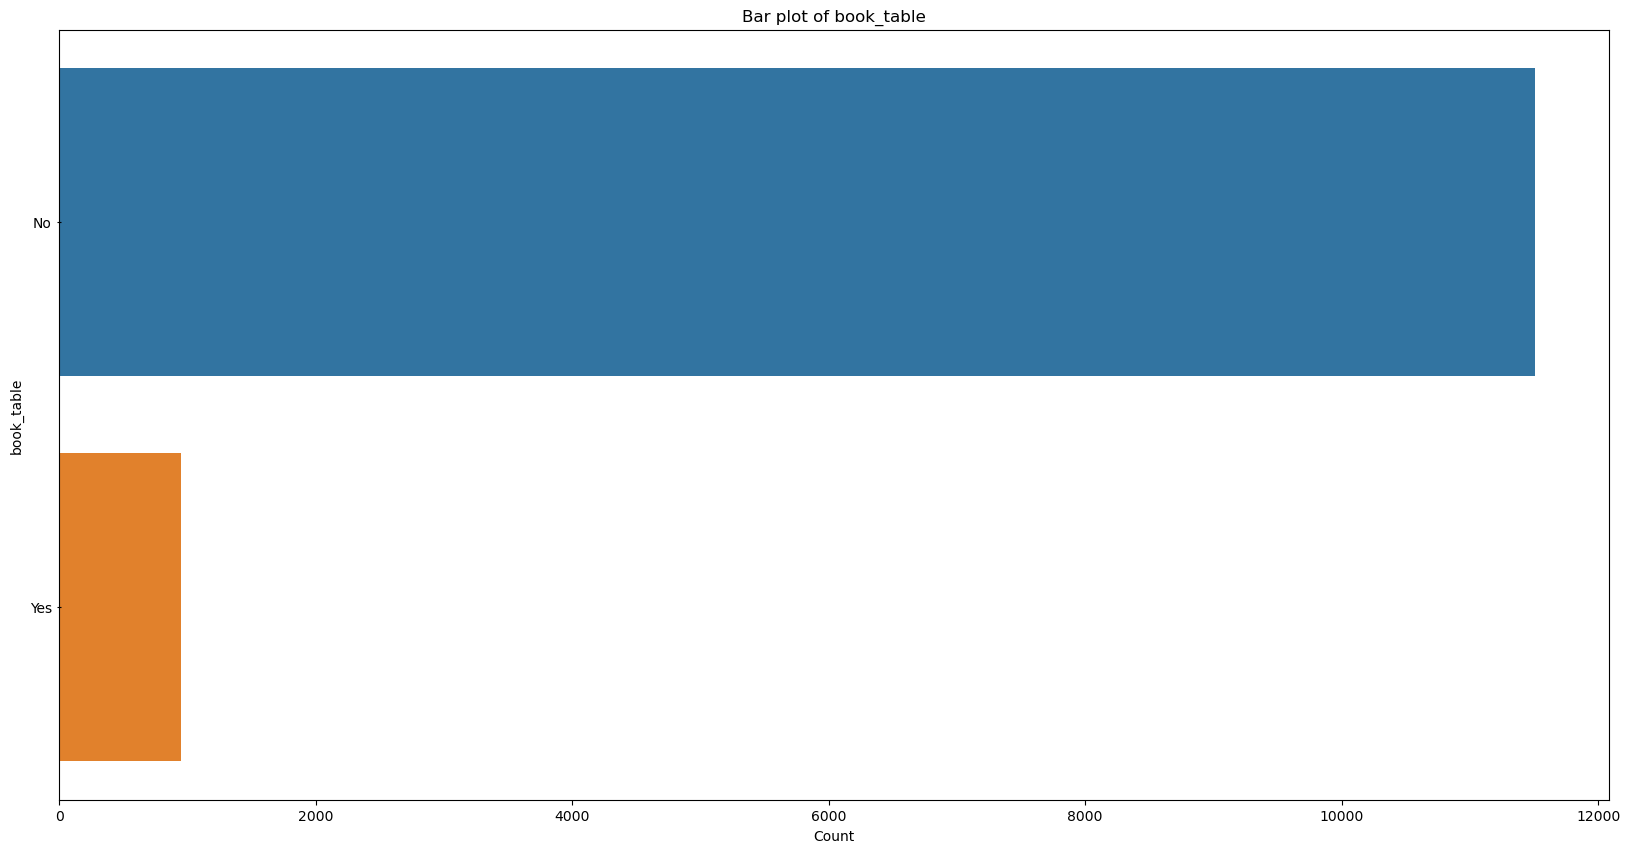

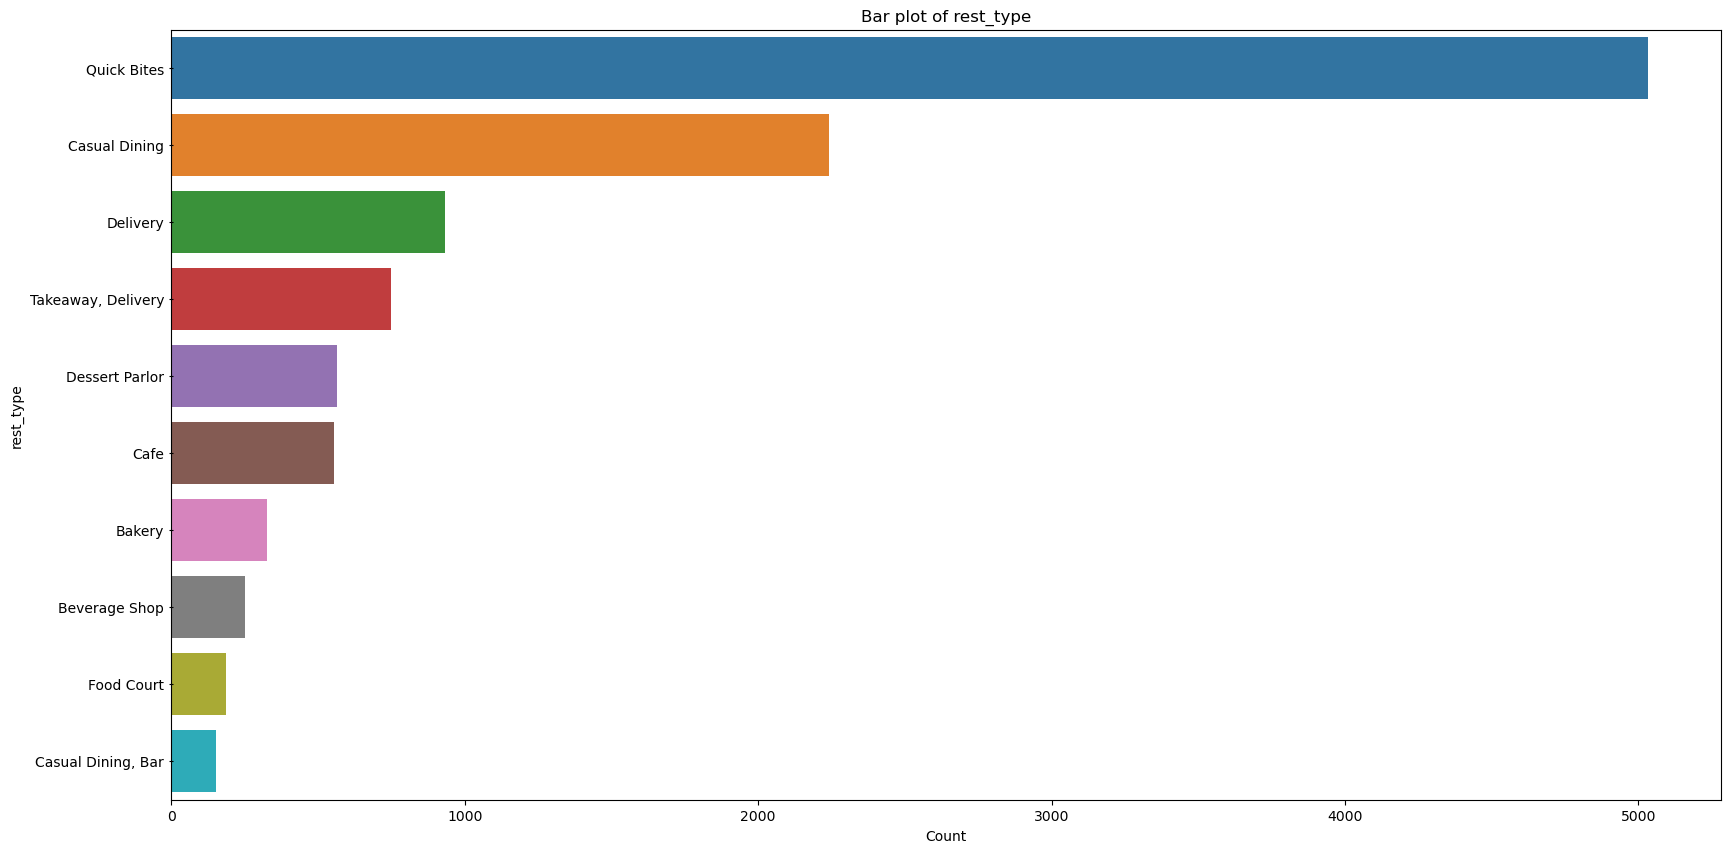

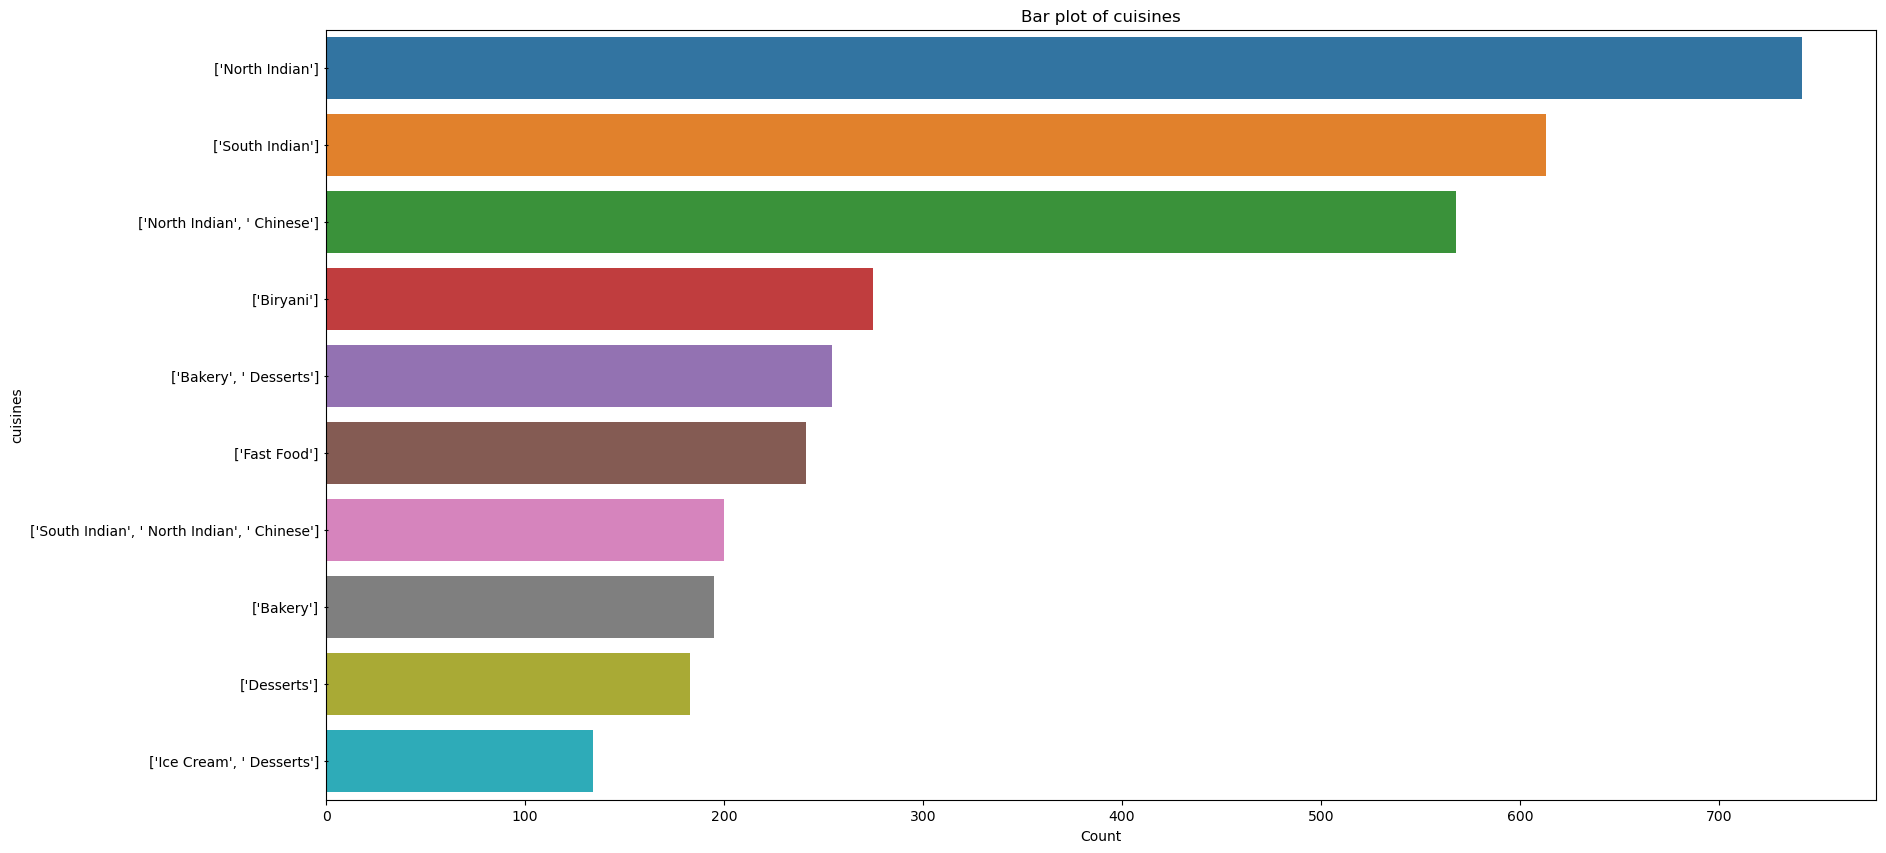

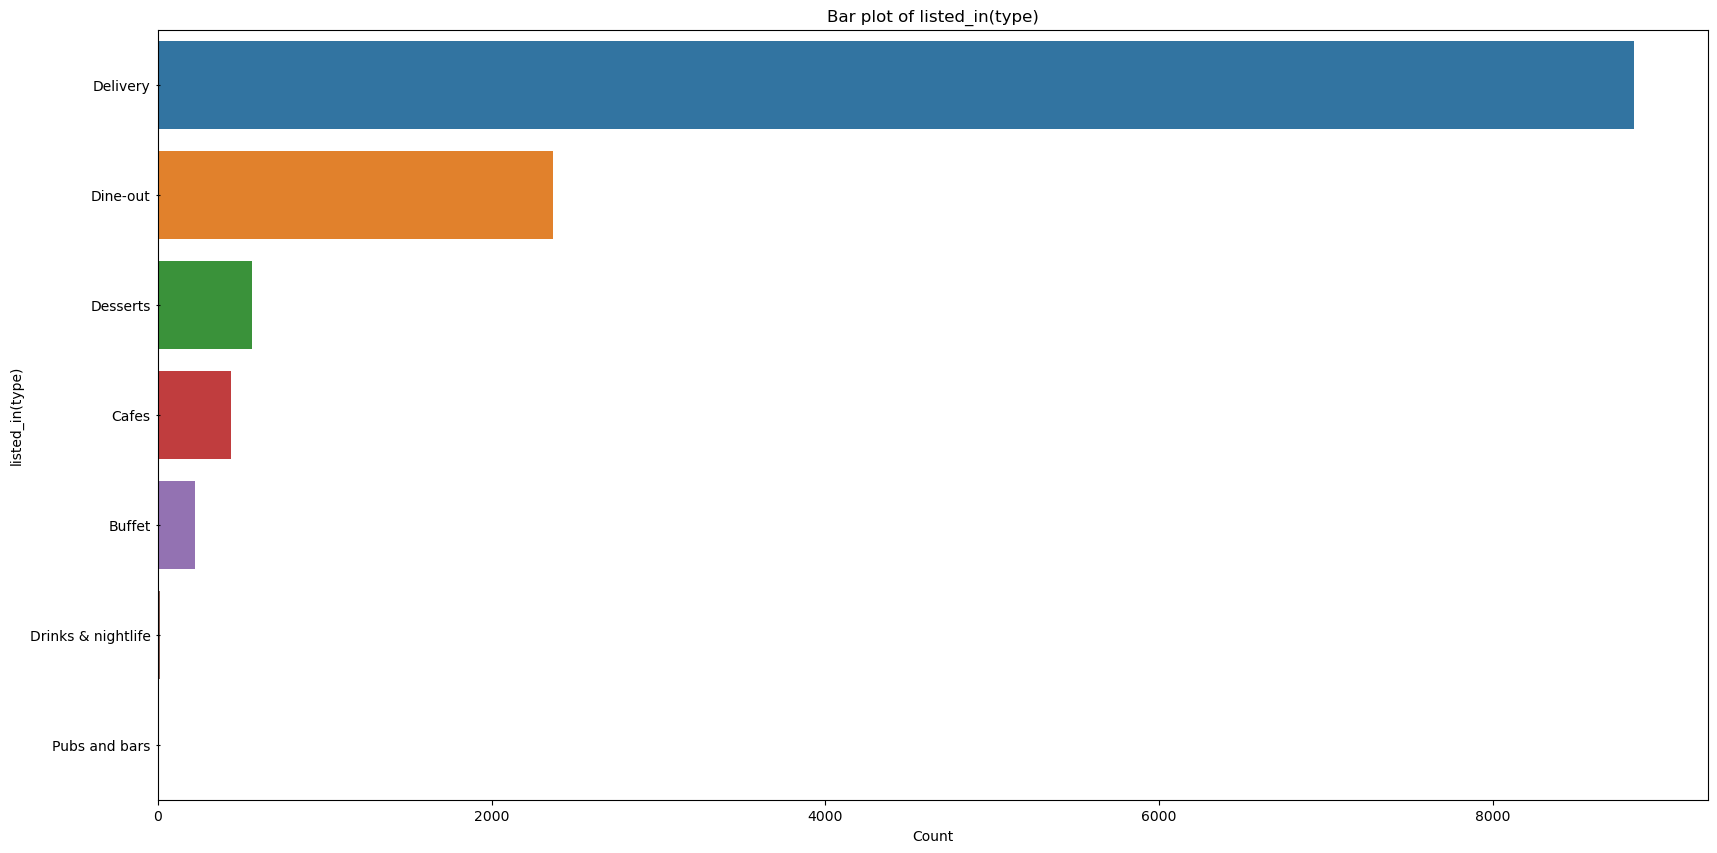

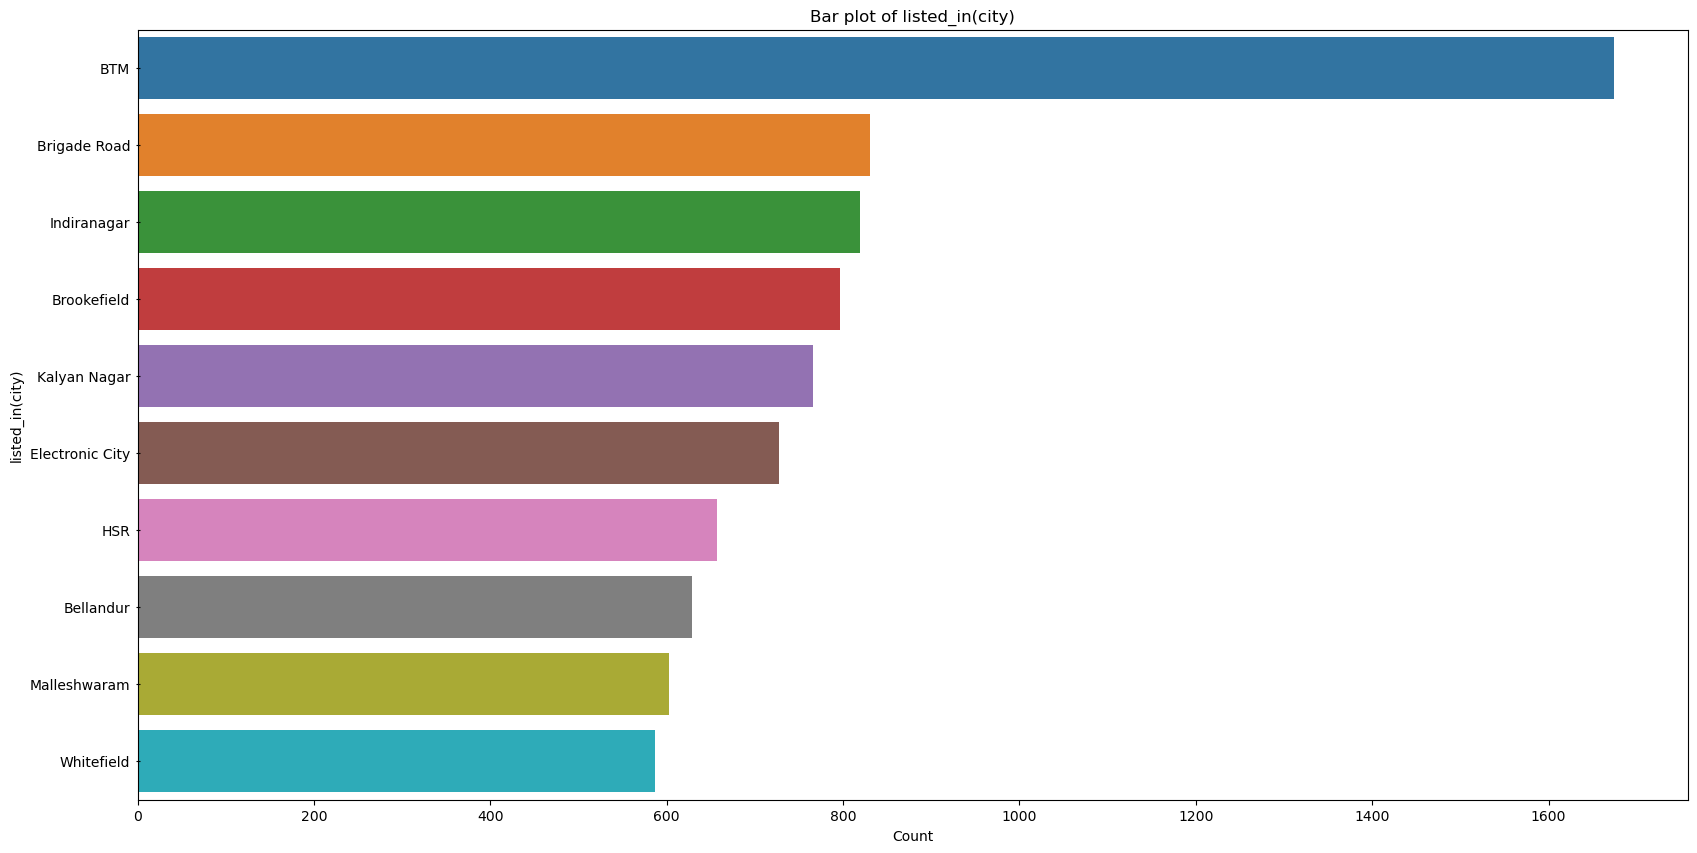

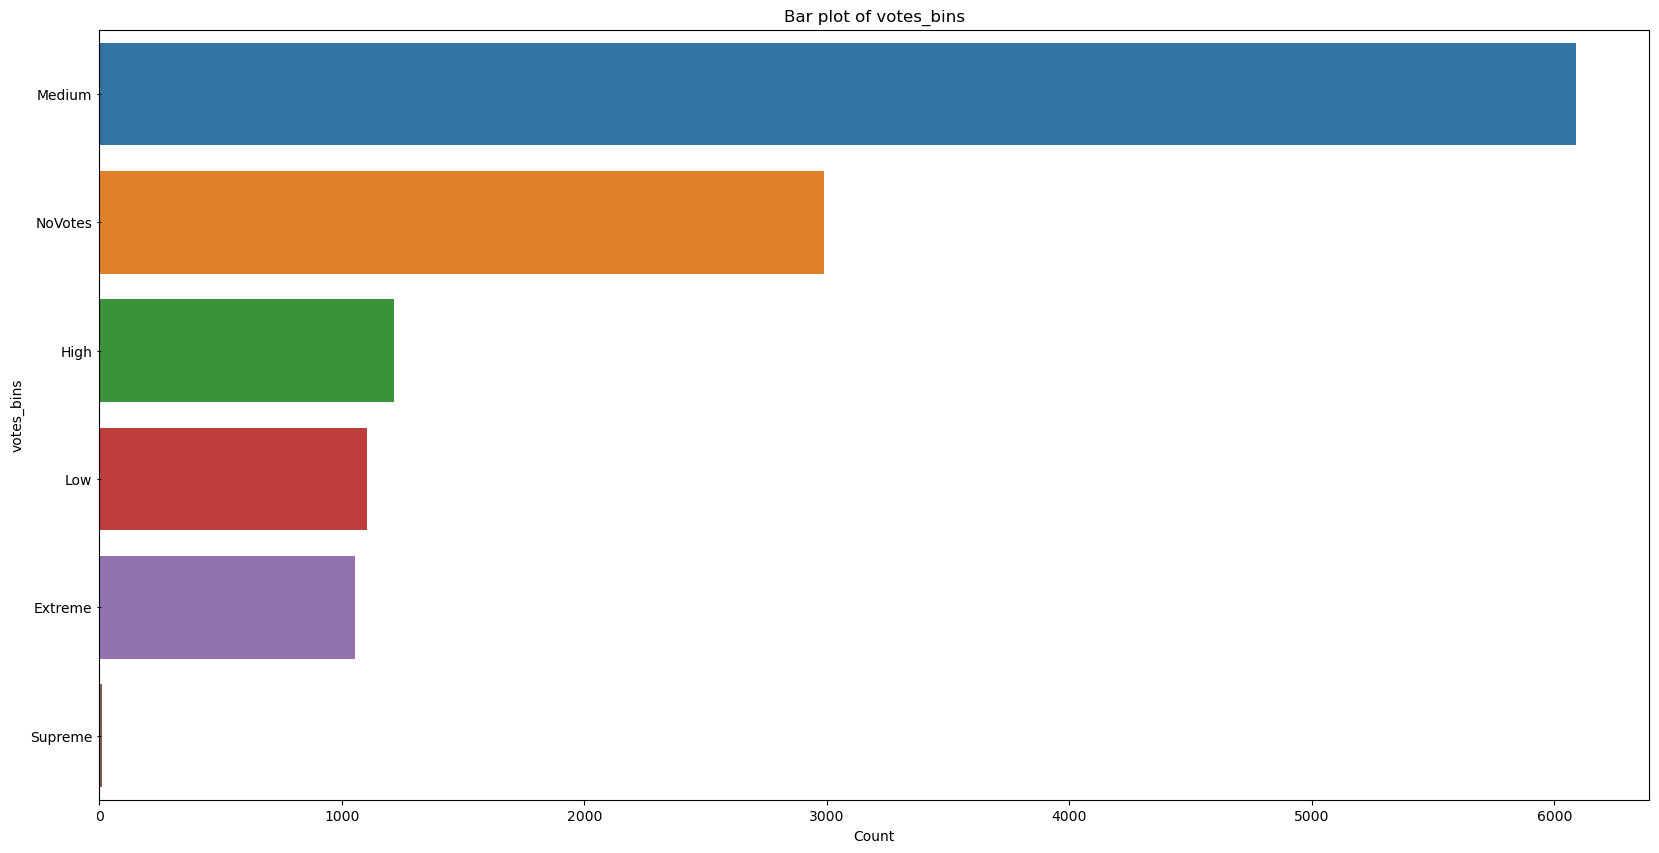

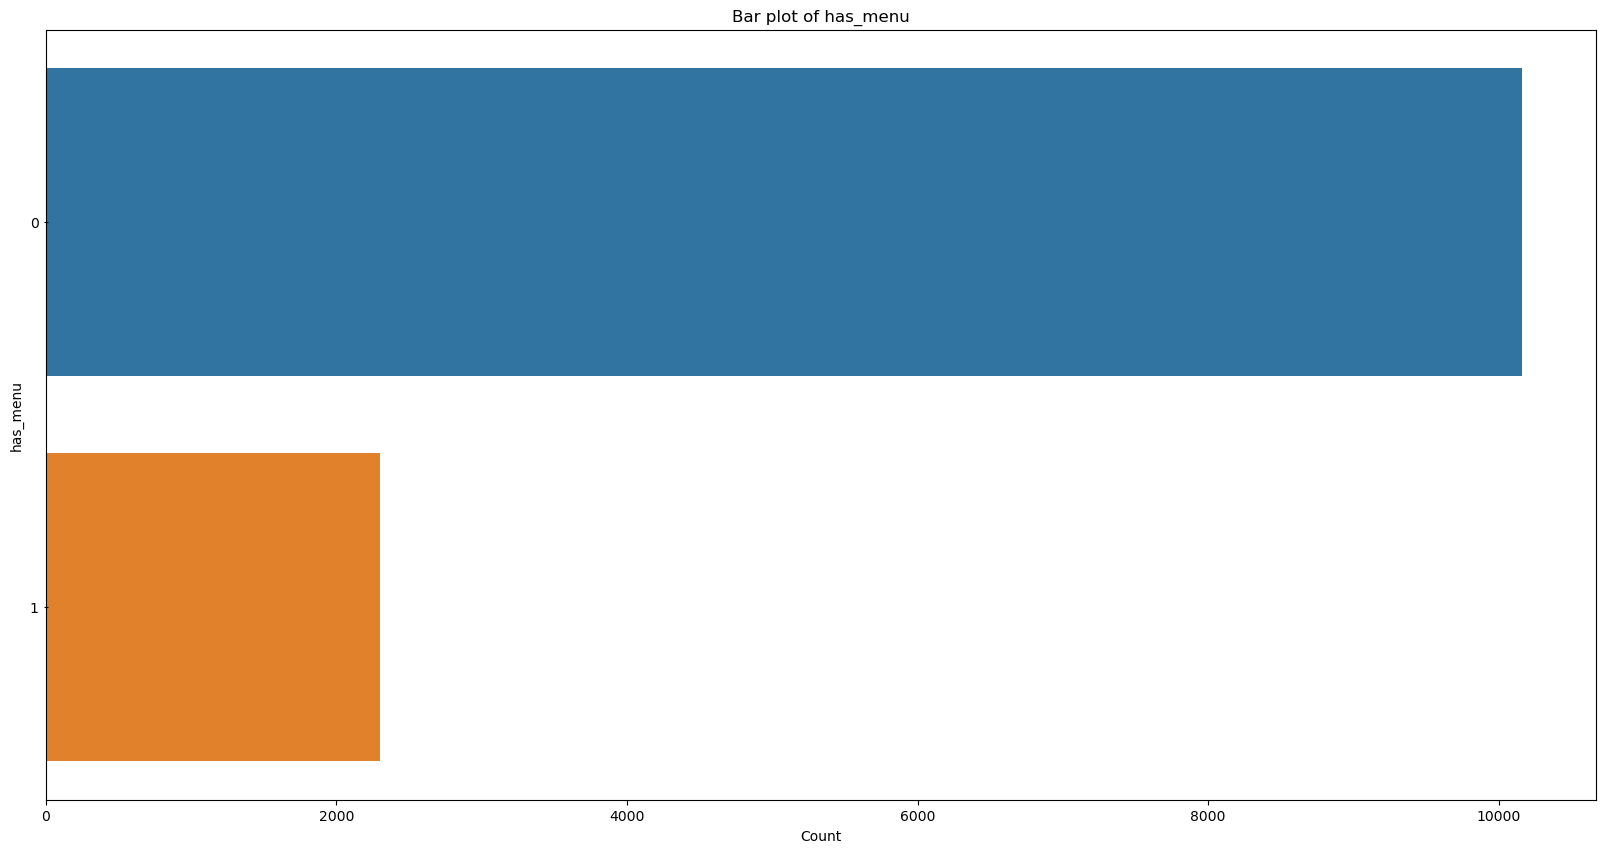

In [8]:
# Plot bar plots for each categorical feature
for feature in categorical_features_1:
    plt.figure(figsize=(20, 10))
    sns.countplot(y=feature, data=data, order=data[feature].value_counts().index[:10])
    plt.title(f'Bar plot of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    
    # Place category labels inside the bars
    plt.tick_params(axis='y', direction='inout')
    
    plt.show()


- **Chain Restaurant Analysis:**
   - `Café Coffee` Day emerges as the largest chain with over 50 outlets in the area, followed closely by `Just Bake` and `Domino's Pizza`, each boasting approximately 40 outlets. `Five Star Chicken` follows with around 36 outlets, while Pizza Hut maintains a similar presence.
   - Notably, some restaurants operate exclusively for delivery orders, indicating a shift towards online food services.

- **Geographical Distribution:**
   - `Whitefield` stands out as a prominent food hub, followed by `BTM`, `Electronic City`, and `HSR`.
   
- **Online Order and Pre-Booking Services:**
   - Half of the market's restaurants do not facilitate online orders, and the majority do not offer pre-booking services.

- **Cuisine and Restaurant Types:**
   - `North Indian` cuisine leads with nearly 5,000 restaurants, highlighting its popularity. Conversely, `Desserts`, `Beverages`, and `Continental Cuisine` are less favored.
   - `Quick Bites` dominate the market, constituting over 40%, followed by `Casual Dining` at approximately 15%.
   - `Delivery` and `Takeaway` options are gaining traction, collectively representing 13% of the market, likely influenced by the rise of online food platforms.

- **Cost Analysis by Cuisine:**
   - `North Indian` cuisine commands the highest average cost, followed by `Chinese`, `South Indian`, `Fast Food`, and `Desserts`.
   - `Fast Food` cuisine consistently offers the most affordable options.

----

# Bivariate Analysis

###  Bivariate analysis is a statistical method used to examine the relationship between two variables that provides a fundamental starting point for understanding relationships in data.

In [9]:
categorical_features_1 = data.select_dtypes('object').columns
numeric_features_1 = data.select_dtypes(include=['float64', 'int64']).columns
numeric_features_1 = numeric_features_1.drop('has_menu')
print("We have {} Numerical Features: {}".format(len(numeric_features_1), numeric_features_1))
print("We have {} Categorical Features: {}".format(len(categorical_features_1), categorical_features_1))

We have 7 Numerical Features: Index(['rate', 'votes', 'approx_cost(for two people)', 'menu_variety',
       'duplicate_count', 'cuisines_weights', 'rest_type_market_share'],
      dtype='object')
We have 12 Categorical Features: Index(['name', 'address', 'location', 'online_order', 'book_table',
       'rest_type', 'cuisines', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)', 'votes_bins'],
      dtype='object')


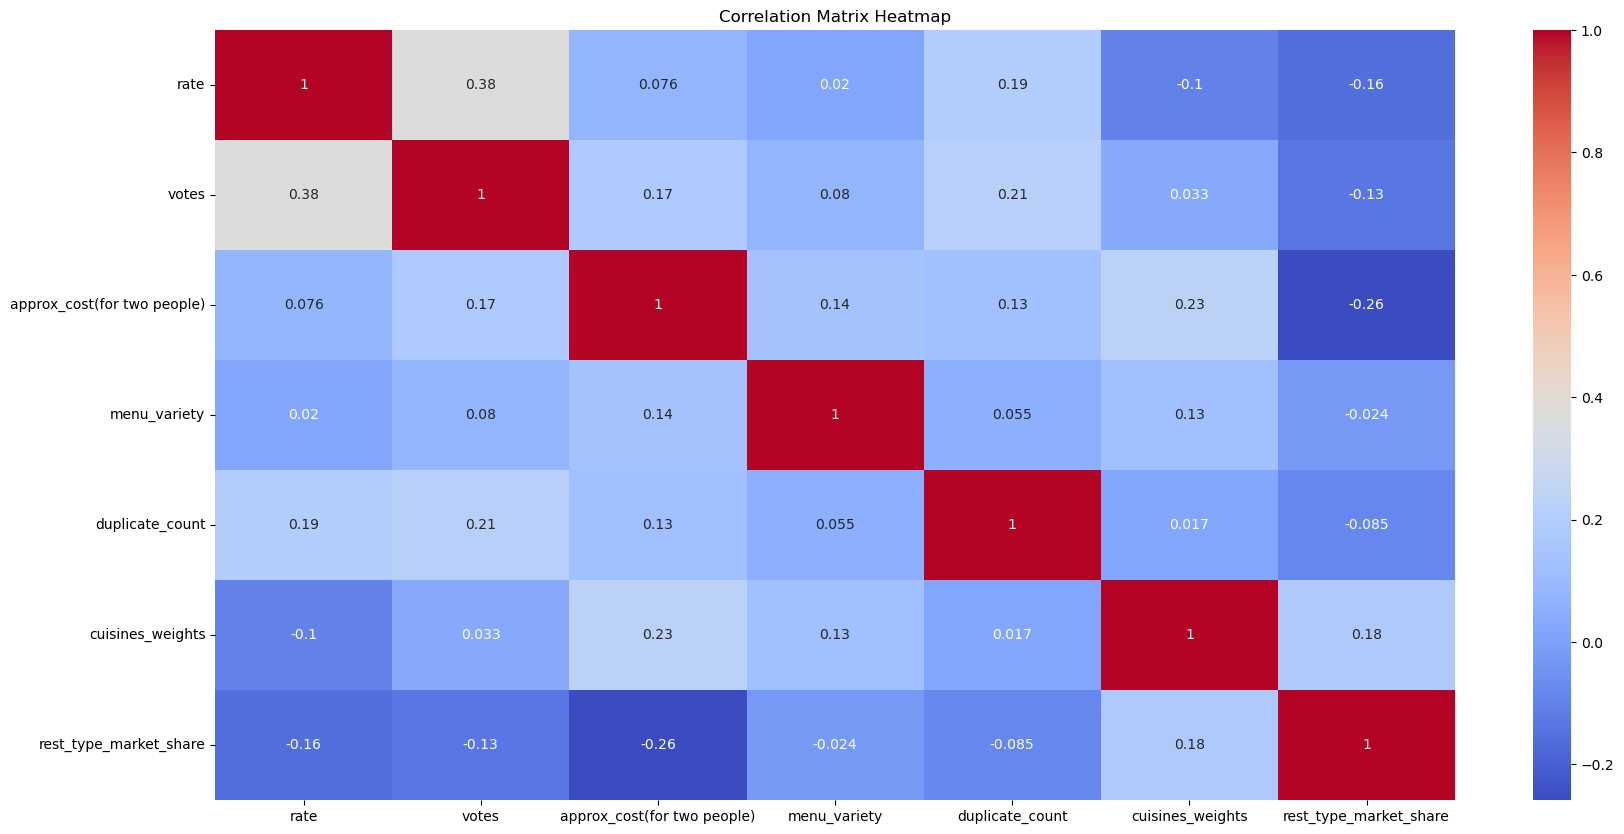

In [10]:
# Correlation matrix heatmap
def pearson_correlation_heatmap(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()
        
        
pearson_correlation_heatmap(data[numeric_features_1])

##### Since our data seems not be normally distributed or have a perfectly linear relationship, and based on the fact that our dataset suffer from extreme outliers and the fact we have alot of categorical data we'll use Spearman's rank correlation to assess the monotonic relationship between the variables.

c:\Users\enay9\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


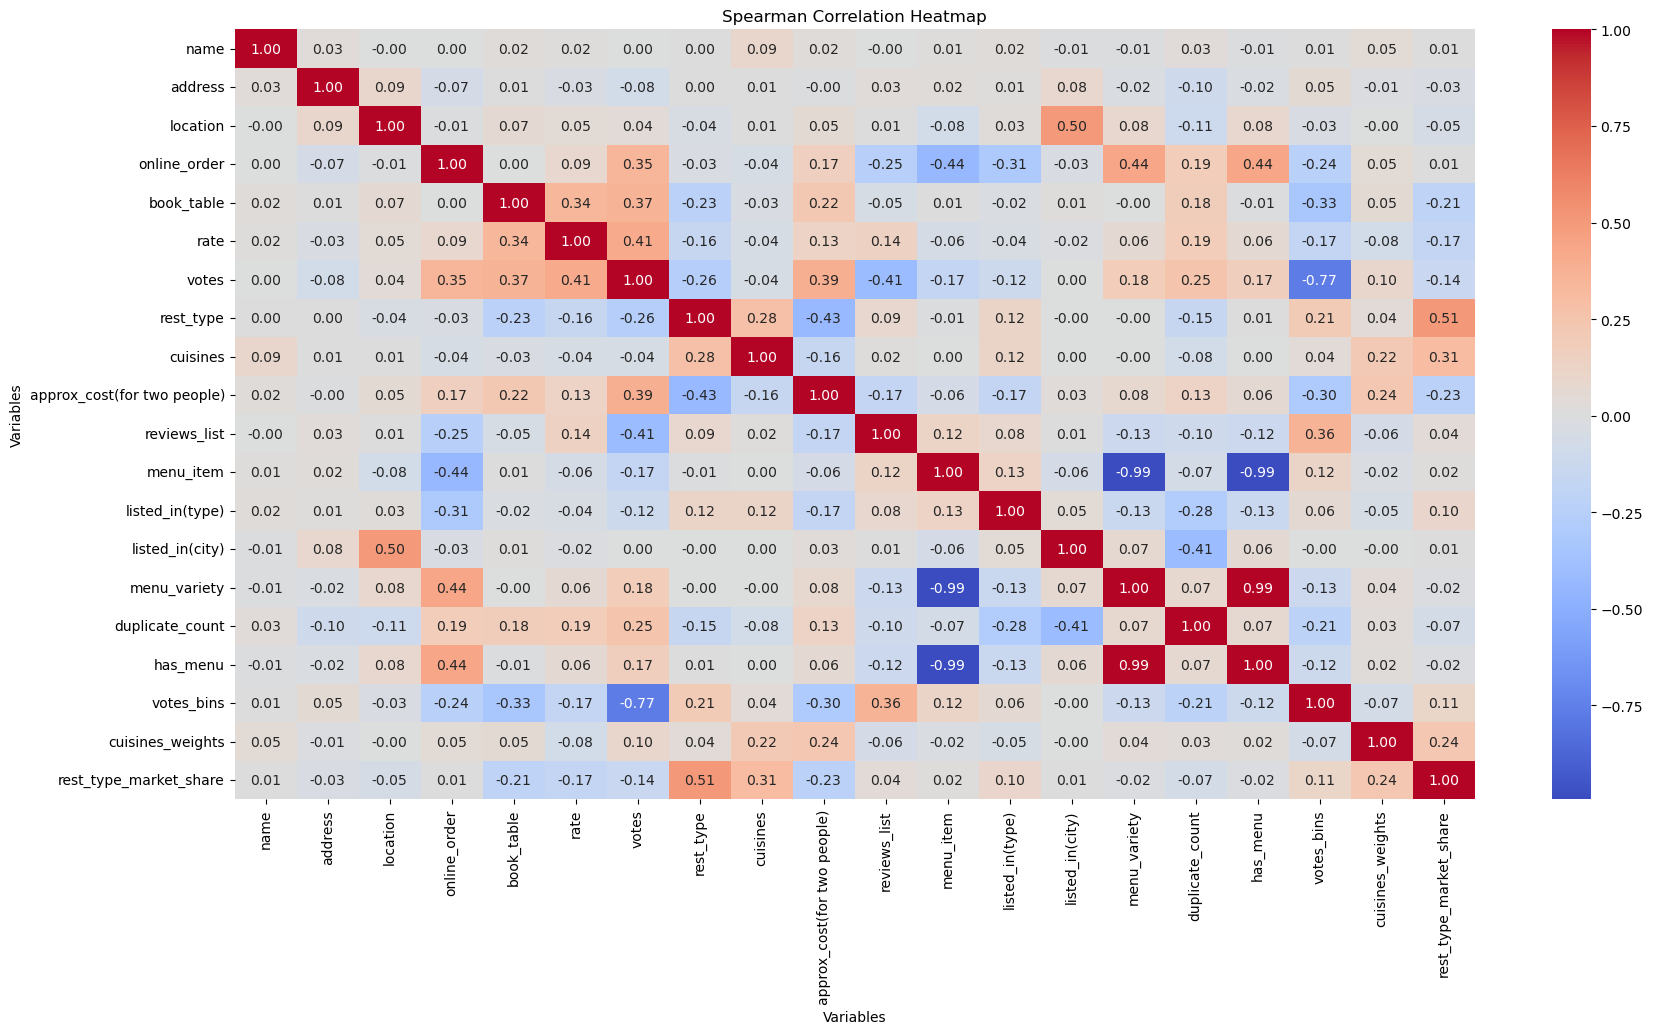

In [11]:
def plot_spearman_correlation_heatmap(data):

    # Calculate Spearman correlation matrix and p-values
    corr_matrix, p_values = spearmanr(data)

    # Plot heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=data.columns, yticklabels=data.columns)
    plt.title('Spearman Correlation Heatmap')
    plt.xlabel('Variables')
    plt.ylabel('Variables')
    plt.show()

# Example usage
plot_spearman_correlation_heatmap(data)


- There is a positive monotonic relationship of 0.35 between Online Order and Votes, **suggesting that restaurants offering online ordering tend to receive more votes.**
- There is a positive monotonic relationship of 0.44 between Online Order and Menu, **indicating that restaurants offering online orders tend to have more extensive menus.**
- There is a positive monotonic relationship of 0.34 between restaurants that offer booking table service and Ratings, **implying that restaurants offering booking table service tend to have higher ratings.**
- There is a positive monotonic relationship of 0.37 between restaurants that offer booking table service and Number of Votes, **suggesting that restaurants offering booking table service tend to receive more participation of votes.**
- There is a negative monotonic relationship of -0.23 between restaurants that offer booking table service and Restaurant Type,**indicating that restaurants offering booking table service may vary in terms of their types.** 
- There is a positive monotonic relationship of 0.22 between restaurants that offer booking table service and Approximate Cost, **suggesting that these restaurants may tend to be associated with higher costs.**
- There is a positive monotonic relationship of 0.41 between Ratings and Number of Votes, **implying that restaurants with higher ratings tend to receive more votes.**
- There is a positive monotonic relationship of 0.39 between Number of Votes and Approximate Cost, **indicating that restaurants with more votes may tend to have higher approximate costs.**
- There is a negative monotonic relationship of -0.43 between Restaurant Type and Approximate Cost, **indicating that different types of restaurants may be associated with varying approximate costs.** 

---

# Queastion that we want to investigate about our data?

----

### Which are the top restaurant chains in Bangalore? 
<a id='question1'></a>

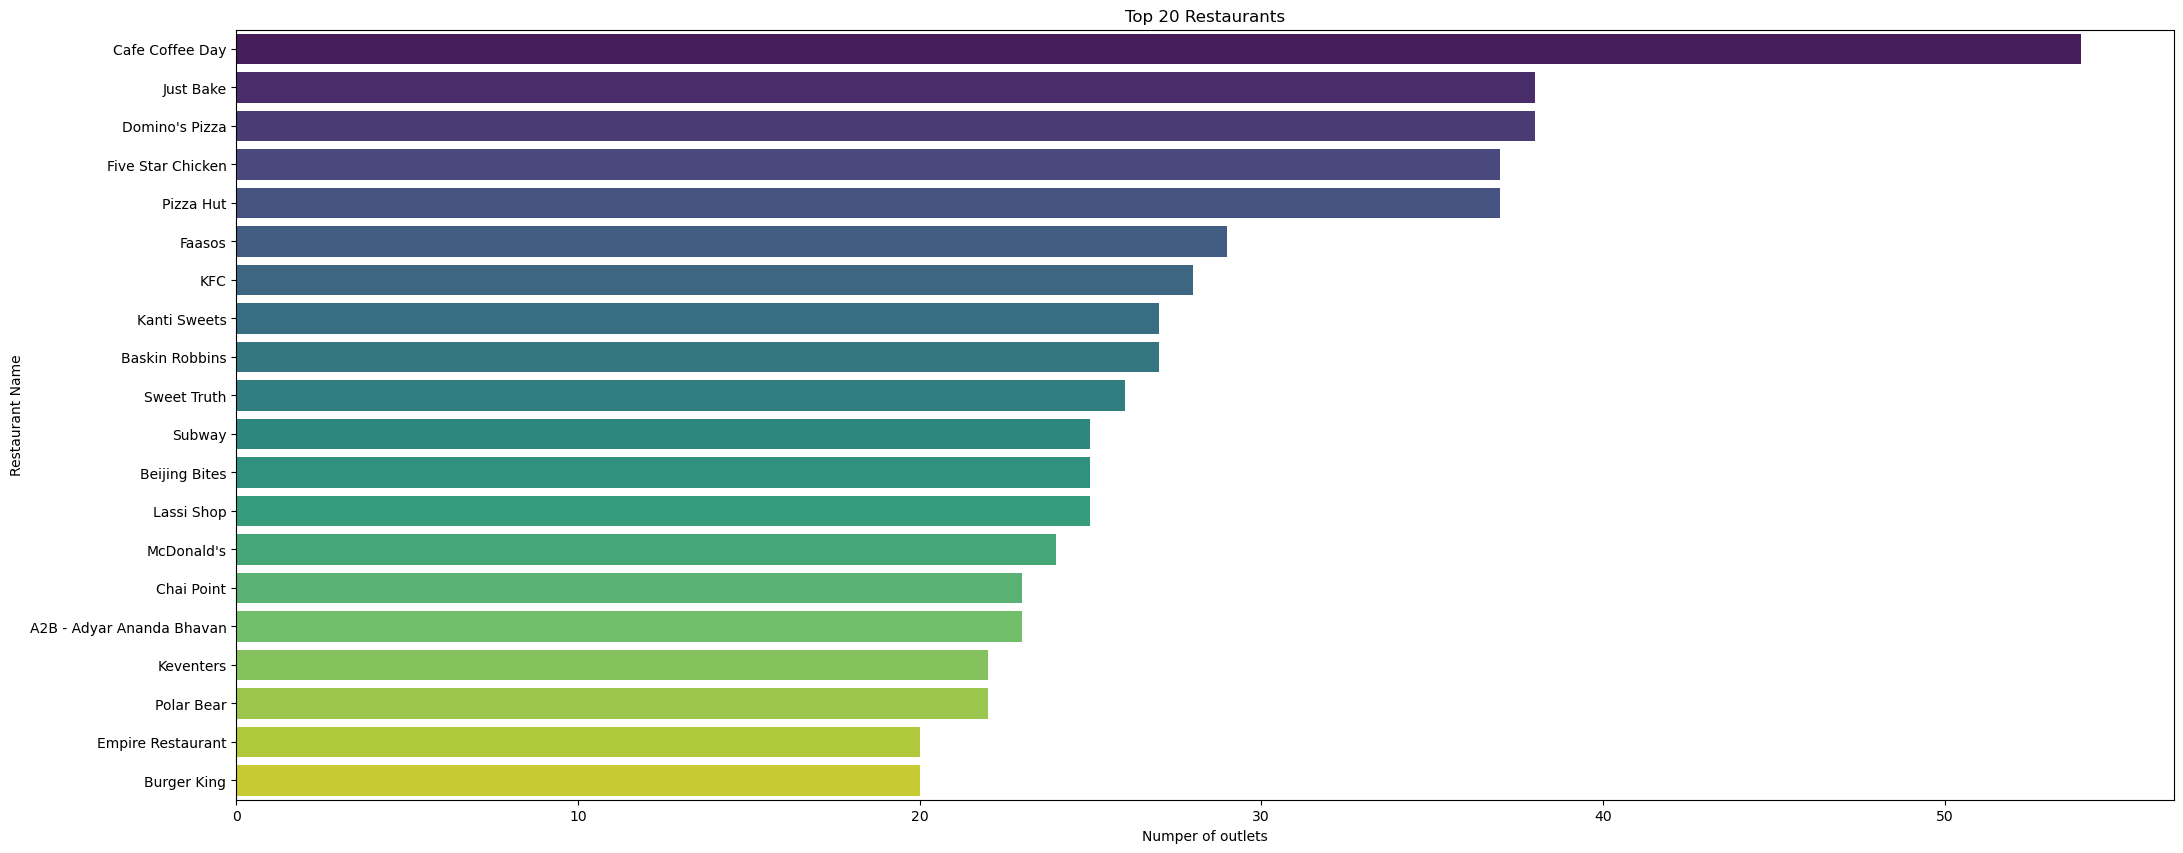

In [12]:
restaurants = data['name'].value_counts().iloc[:20]
plt.figure(figsize=(25, 10)) 
sns.barplot(x=restaurants.values, y=restaurants.index, palette="viridis")
plt.xlabel('Numper of outlets')
plt.ylabel('Restaurant Name')
plt.title('Top 20 Restaurants')
plt.show()

### <font color='gray'>This provides an overview of the dominant restaurant chains in the market landscape.</font>

*******

### How many of the restuarants do not accept online orders? 
<a id='question2'></a>


In [13]:
online_order = data['online_order'].value_counts()
print("Number of restaurants that have online order: {}, whereas the number of restaurants that do not have online order: {}".format(online_order[1], online_order[0]))

Number of restaurants that have online order: 6020, whereas the number of restaurants that do not have online order: 6437


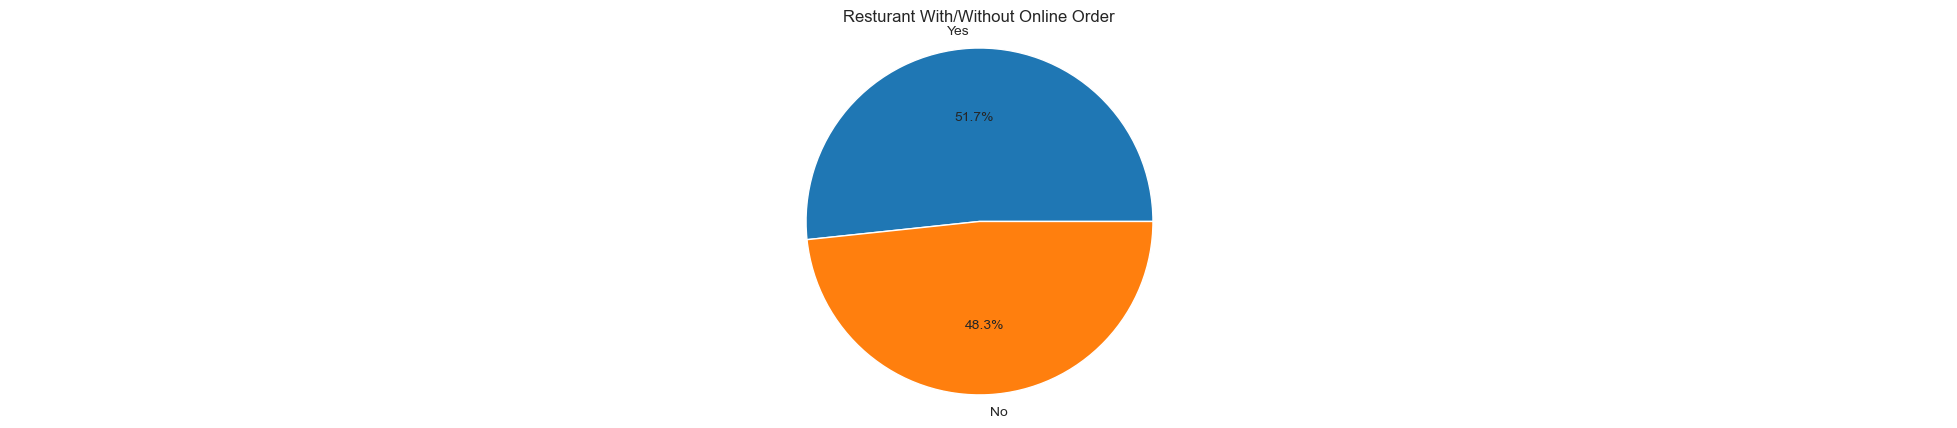

In [14]:
plt.figure(figsize=(25, 5))
sns.set_style("whitegrid")  # Optional: Set the style
plt.pie(online_order.values, labels=online_order.index, autopct='%1.1f%%')
plt.title('Resturant With/Without Online Order')
plt.axis('equal')  
plt.show()


### <font color='gray'>Half of the resturants in the market do not accept online ordrs.</font>

*********

### What is the ratio of restaurants that provide and do not provide table booking?  <a id='question3'></a>

In [15]:
Booking = data['book_table'].value_counts()
print("Number of restaurants that offer Booking: {}, whereas the number of restaurants that do not  offer Booking: {}".format(Booking[1], Booking[0]))

Number of restaurants that offer Booking: 948, whereas the number of restaurants that do not  offer Booking: 11509


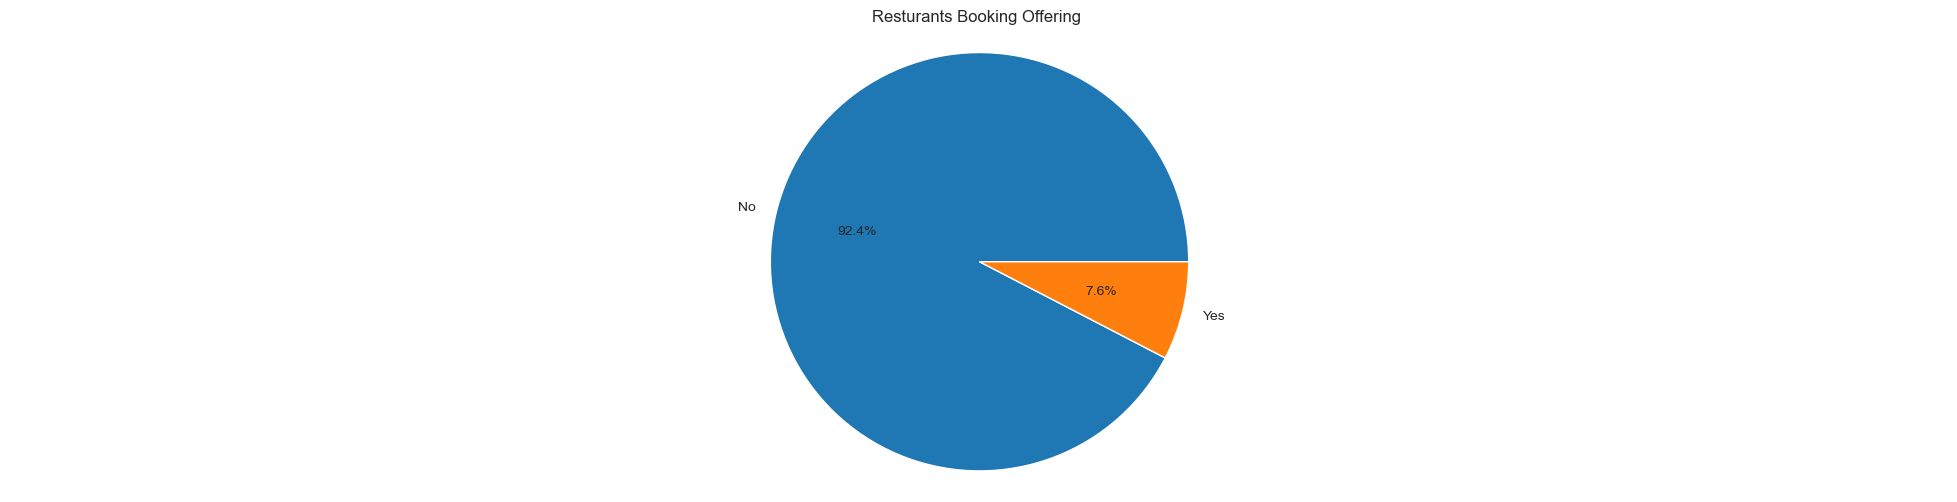

In [16]:
plt.figure(figsize=(25, 6))
sns.set_style("whitegrid")  # Optional: Set the style
plt.pie(Booking.values, labels=Booking.index, autopct='%1.1f%%')
plt.title('Resturants Booking Offering ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### <font color='gray'>The dominant majority of the market does not provide a pre-booking service.</font>

*****************

### How is the rating distribution among the restaurants in the market? <a id='question4'></a>

In [17]:
data['rate'].describe()

count    12457.000000
mean         3.633451
std          0.384038
min          1.800000
25%          3.400000
50%          3.700000
75%          3.833333
max          4.900000
Name: rate, dtype: float64

c:\Users\enay9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


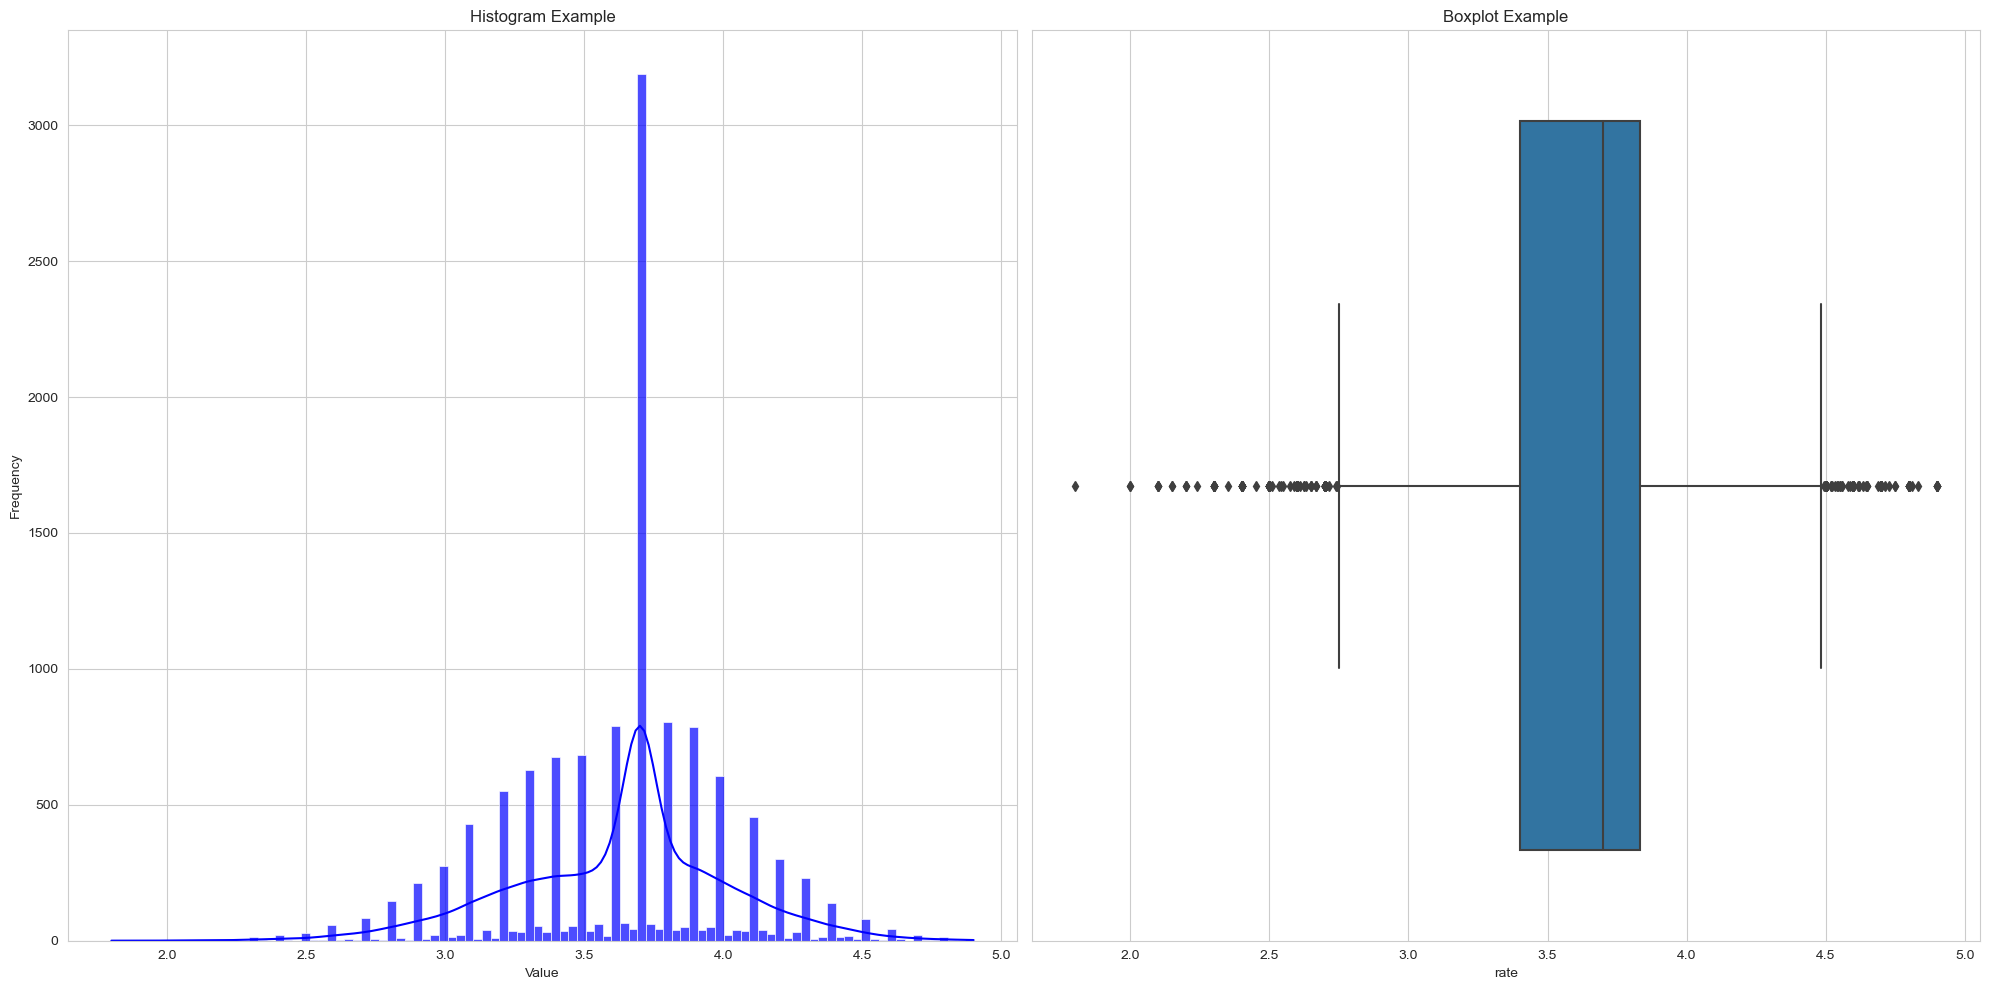

In [18]:
# Create a figure and a set of subplots (1 row, 2 columns) with specified figsize
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot histogram on the first subplot (left)
sns.histplot(data['rate'], bins=100, color='blue', alpha=0.7, kde=True, ax=axs[0])
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram Example')
axs[0].grid(True)

# Plot boxplot on the second subplot (right)
sns.boxplot(data['rate'], ax=axs[1])
axs[1].set_title('Boxplot Example')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show();

### <font color='gray'>The majority of restaurant ratings, approximately `50%`, fall within the range of `3.4` to `3.8`. Conversely, only about `25%` of restaurant ratings are found within the range of `1.8` to `3.4`.</font>


*********

### Exploring the Relationship Between Cost and Rating: How Does Price Impact Ratings? <a id ="question5"> </a>

Text(0.5, 1.0, 'Cost & Rating')

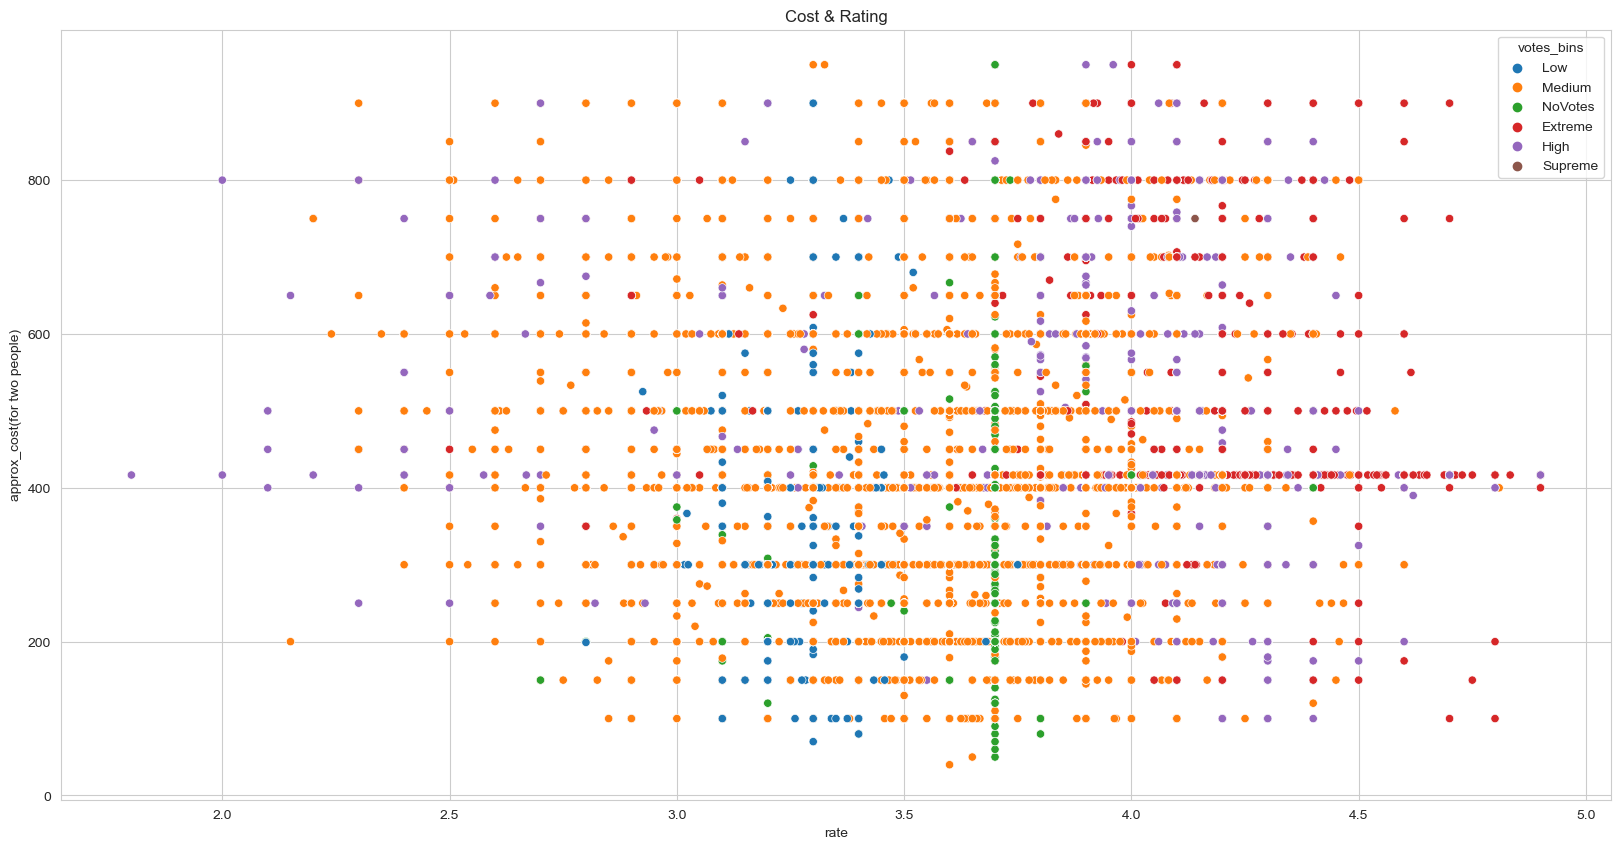

In [19]:
# Create a scatterplot
plt.figure(figsize=(20,10))
sns.scatterplot(x=data["rate"], y=data["approx_cost(for two people)"], hue=data["votes_bins"])

# Add labels and a title
plt.xlabel("rate")
plt.ylabel("approx_cost(for two people)")
plt.title("Cost & Rating")

### <font color='gray'>Restaurants with lower ratings tend to attract a higher number of votes compared to the majority of establishments in the market. This suggests that their poor reputation is well-known, extending beyond a mere lack of voter engagement.</font>
### <font color='gray'>The distribution of the number of votes per restaurant tends to be moderate across both the rating and approximate cost spectrum. </font>
### <font color='gray'>A weak positive correlation exists between cost and rating. This implies that restaurants with medium to high costs tend to have slightly higher ratings</font>
### <font color='gray'>Restaurants with higher ratings typically garner a significantly larger number of votes from patrons.</font>
### <font color='gray'>An intriguing trend emerges where restaurants receiving ratings of 2.5 or lower tend to have higher number of votes and higher prices compared to the majority of establishments.</font>

**************

### What does the distribution of costs for two people look like across restaurants? <a id="question6"></a>

In [20]:
data["approx_cost(for two people)"].describe()

count    12457.000000
mean       398.151824
std        179.491140
min         40.000000
25%        250.000000
50%        400.000000
75%        500.000000
max        950.000000
Name: approx_cost(for two people), dtype: float64

Text(0.5, 1.0, 'Cost over the market')

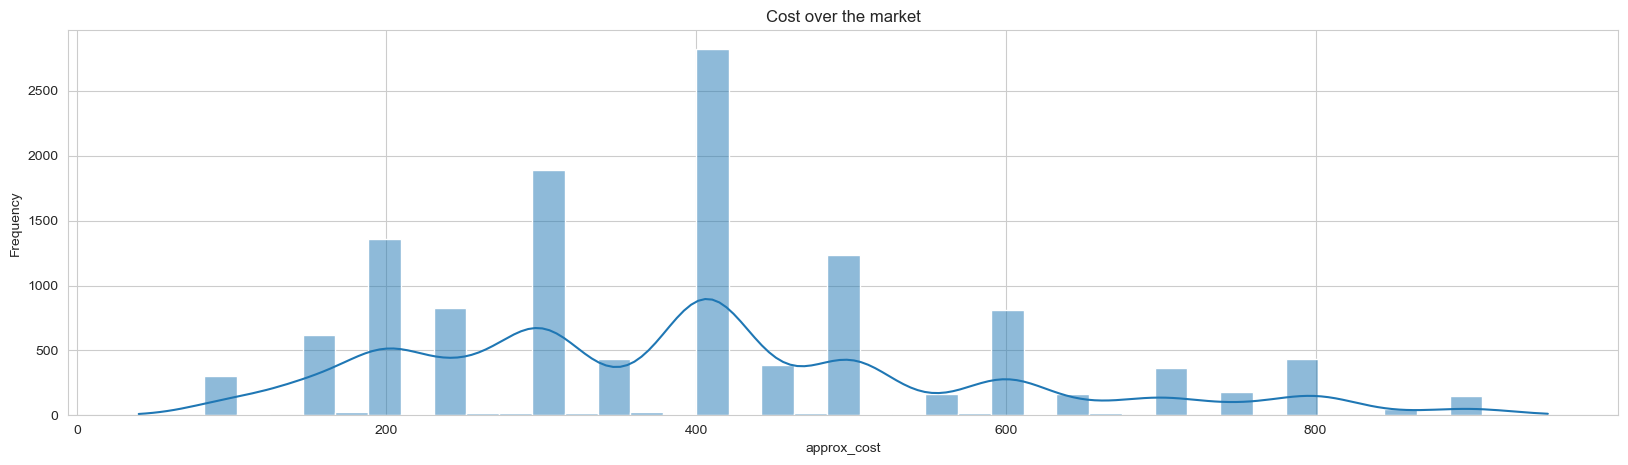

In [21]:
plt.figure(figsize=(20,5))
sns.histplot(data = data["approx_cost(for two people)"] , kde = True)

# Add labels and a title
plt.xlabel("approx_cost")
plt.ylabel("Frequency")
plt.title("Cost over the market")

### <font color='gray'>`50%` of the market have a pricing stratigy that do not exceeds `400$`</font>
### <font color='gray'>`75%` of the market have a pricing stratigy that do not exceeds `500$`</font>
### <font color='gray'>Only `25%` of the market have a high end pricing stratigy exceeds `500$` to `950$`</font>

**************

### Is there any difference between votes of restaurants accepting and not accepting online orders in terms of priceing stratigies? <a id="question7"></a>

In [22]:
groupd_data = data.groupby(['online_order'])['approx_cost(for two people)']
groupd_data.describe()

,count,mean,std,min,25%,50%,75%,max
online_order,,,,,,,,
No,6020.0,367.139384,171.434062,50.0,250.0,350.0,416.630112,950.0
Yes,6437.0,427.155225,182.003787,40.0,300.0,400.0,500.000000,950.0


In [23]:
# Performing bolean indexing for the dataframe for visualization perposes
online_order = data[data['online_order'] == 'Yes']
no_online_order = data[data['online_order'] == 'No']

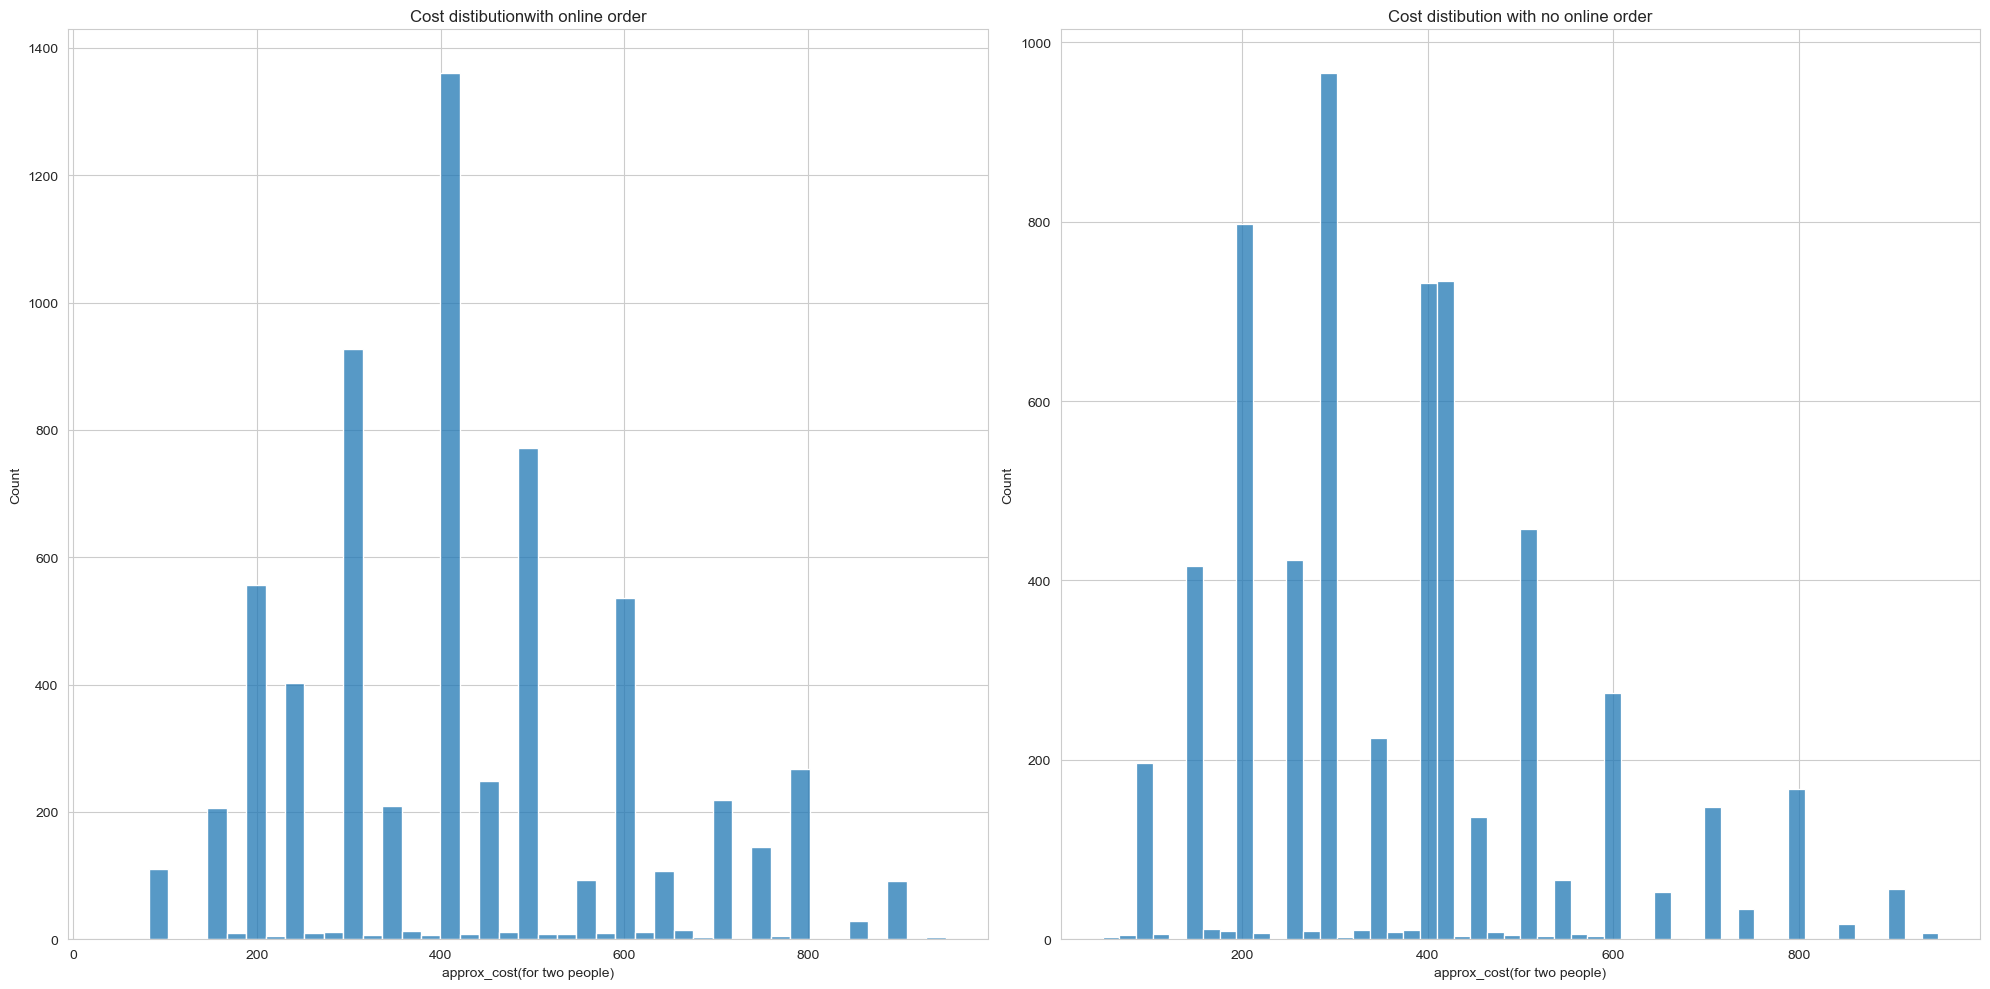

In [24]:
# Create a figure and a set of subplots (1 row, 2 columns) with specified figsize
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Cost distibution analysis of returants that provide online order services
sns.histplot(online_order['approx_cost(for two people)'], ax=axs[0])
axs[0].set_title('Cost distibutionwith online order')
axs[0].grid(True)


# Cost distibution analysis of returants that does not provide online order services
sns.histplot(no_online_order['approx_cost(for two people)'], ax=axs[1])
axs[1].set_title('Cost distibution with no online order')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show();

c:\Users\enay9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\enay9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


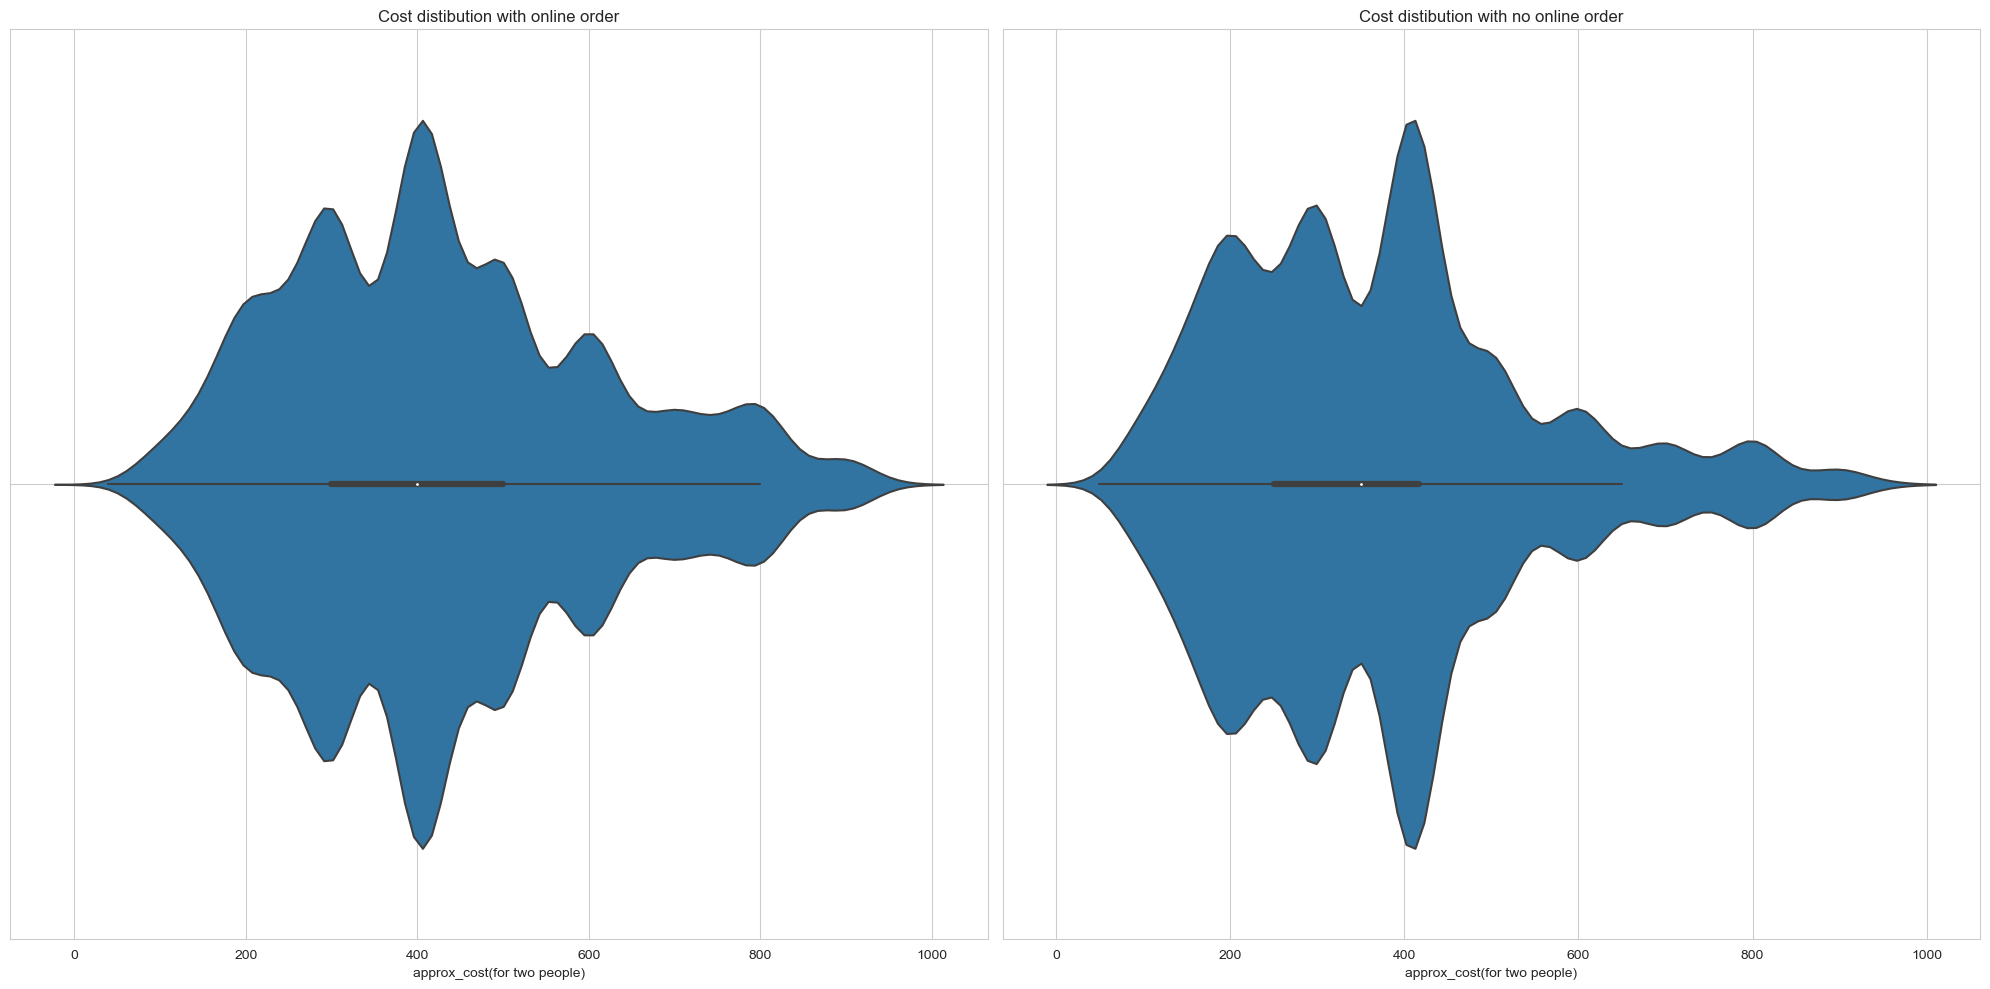

In [25]:
# Create a figure and a set of subplots (1 row, 2 columns) with specified figsize
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Cost distibution analysis of returants that provide online order services
sns.violinplot(online_order['approx_cost(for two people)'], ax=axs[0])
axs[0].set_title('Cost distibution with online order')
axs[0].grid(True)


# Cost distibution analysis of returants that does not provide online order services
sns.violinplot(no_online_order['approx_cost(for two people)'], ax=axs[1])
axs[1].set_title('Cost distibution with no online order')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show();

### <font color='gray'>Resturants that offer online order servces tends to have a littlebit high prices. </font>
### <font color='gray'>Resturants that Does not offer online order servces tends to have a littlebit of a flatten distribution aroounf 400 and more entailed to  the right. </font>

**************

### Is there any difference between votes of restaurants accepting and not accepting online orders in terms of ratings? <a id="question77"></a>

In [26]:
groupd_order_data = data.groupby(['online_order'])['votes'].describe().reset_index()
groupd_order_data

,online_order,count,mean,std,min,25%,50%,75%,max
0,No,6020.0,145.343256,631.288483,0.0,0.0,8.0,47.0,14956.0
1,Yes,6437.0,217.509949,559.374911,0.0,14.0,55.0,192.0,16588.5


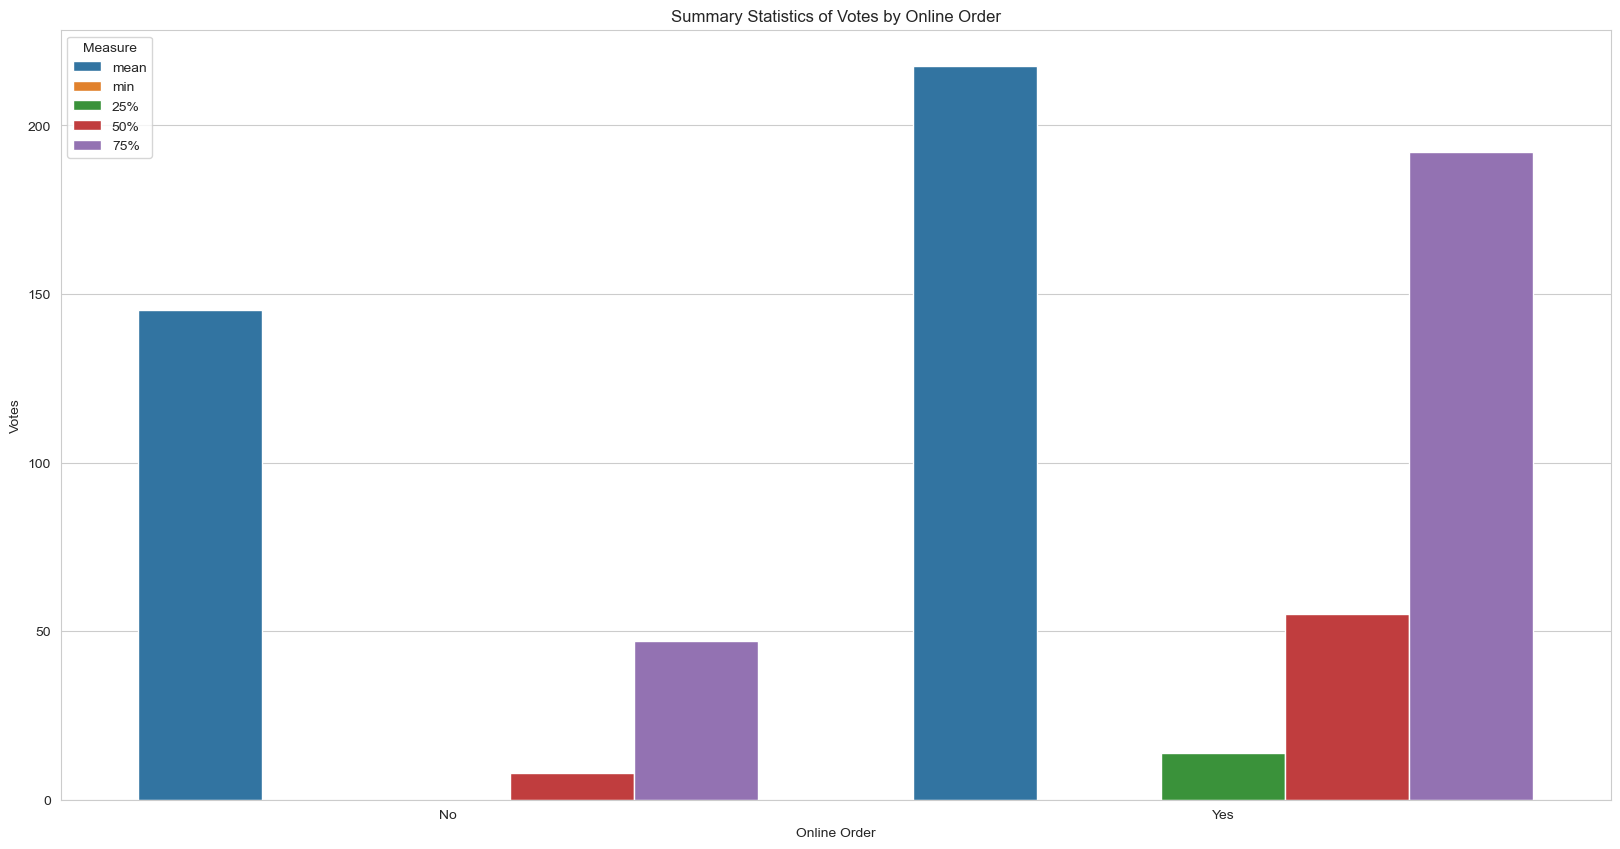

In [27]:
# Melt the DataFrame to have a single column for the measures
melted_data = pd.melt(groupd_order_data, id_vars=['online_order'], value_vars=['mean', 'min', '25%', '50%', '75%'], var_name='measure')

# Set up the plot
plt.figure(figsize=(20, 10))

# Plot the barplot
sns.barplot(x='online_order', y='value', hue='measure', data=melted_data)
plt.xlabel('Online Order')
plt.ylabel('Votes')
plt.title('Summary Statistics of Votes by Online Order')
plt.legend(title='Measure')
plt.show()




---

### Restaurants Offering Online Order Services Attract More Customer Ratings

Restaurants that offer online order services tend to attract a higher level of customer participation in providing ratings. This suggests that the convenience of online ordering may positively influence customers to engage more actively in rating their dining experiences.

### Lack of Online Order Services Corresponds to Lower Customer Rating Participation

Conversely, restaurants that do not provide online order services tend to experience lower levels of customer participation in the rating process. This observation implies that the absence of online ordering options may contribute to reduced engagement from customers when it comes to providing ratings.

### Noteworthy: A Quarter of Restaurants Without Online Order Services Have Minimal Rating Participation

Interestingly, approximately 25% of restaurants that do not offer online order services report minimal to no participation in customer ratings. This finding underscores the potential impact of online convenience on encouraging customers to share their experiences and opinions.

---


**************

### What are the most prevalent cuisines of restaurants found in the city?<a id='question8'></a>

In [28]:
data['cuisines'] = data['cuisines'].str.split(",")

unique_cuisines = []
common_cuisines = {}
for cuisines_list in data['cuisines']:
    for cuisine in cuisines_list:
        if cuisine.strip() not in unique_cuisines:
            unique_cuisines.append(cuisine.strip())
        else:
            if cuisine.strip() not in common_cuisines:
                common_cuisines[cuisine.strip()] = 1
            else:
                common_cuisines[cuisine.strip()] += 1

In [29]:
common_cuisines_df = pd.DataFrame.from_dict(common_cuisines, orient='index', columns=['Count']).reset_index()

# Renaming the columns
common_cuisines_df.columns = ['Cuisine', 'Count']

# Sorting the DataFrame by count in descending order
common_cuisines_df = common_cuisines_df.sort_values(by='Count', ascending=False)

# Resetting the index
common_cuisines_df = common_cuisines_df.reset_index(drop=True)

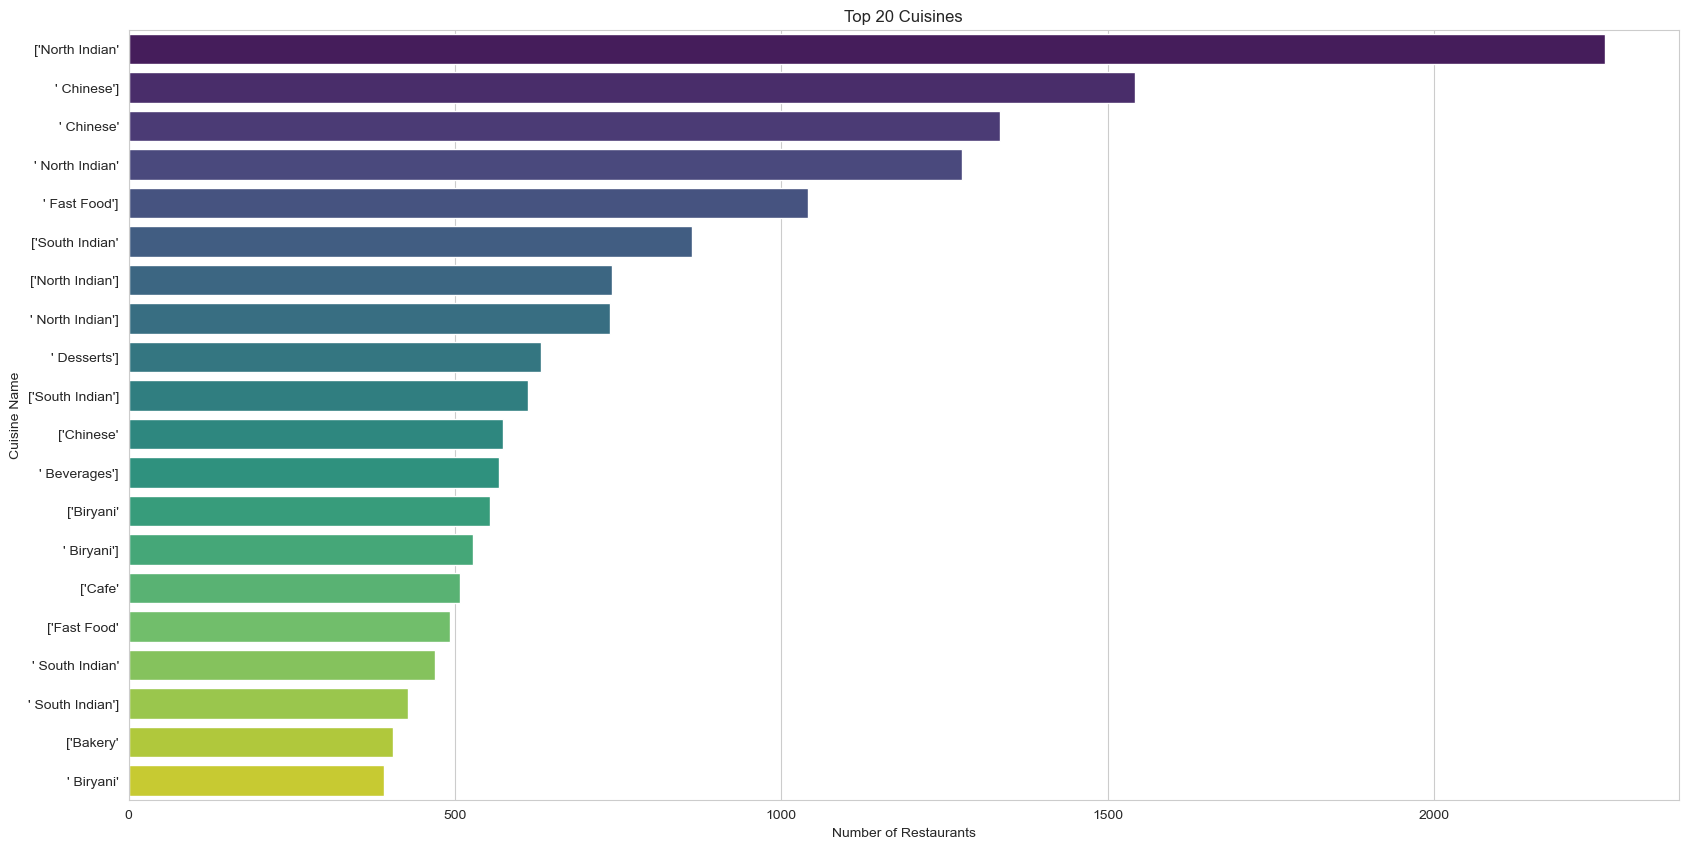

In [30]:

# Extracting the top 20 cuisines based on count
top_20_cuisines = common_cuisines_df.head(20)

# Creating the bar plot
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.barplot(y=top_20_cuisines['Cuisine'], x=top_20_cuisines['Count'], palette="viridis")
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Name')
plt.title('Top 20 Cuisines')
plt.show()


### `North Indian` cuisine is the most popular cuisine, with almost 5,000 restaurants. This is more than double the number of restaurants for the second most popular cuisine, Chinese.
### `Desserts`, `beverages`, and `continental cuisine` are all relatively unpopular, with fewer than 1,000 restaurants each. This suggests that people in this area are more interested in savory foods than sweet or international options.
### `Fast food`, `biryani`, and `South Indian` cuisine are all moderately popular, with between 1,000 and 2,000 restaurants each. This suggests that there is a demand for both quick and sit-down options, as well as for regional flavors.

**************

### **Market Segmentation** Analyzing Dominant and Emerging Restaurant Types: Uncovering Market Leaders and Exploring Growth Opportunities.... <a id='question5757'></a>

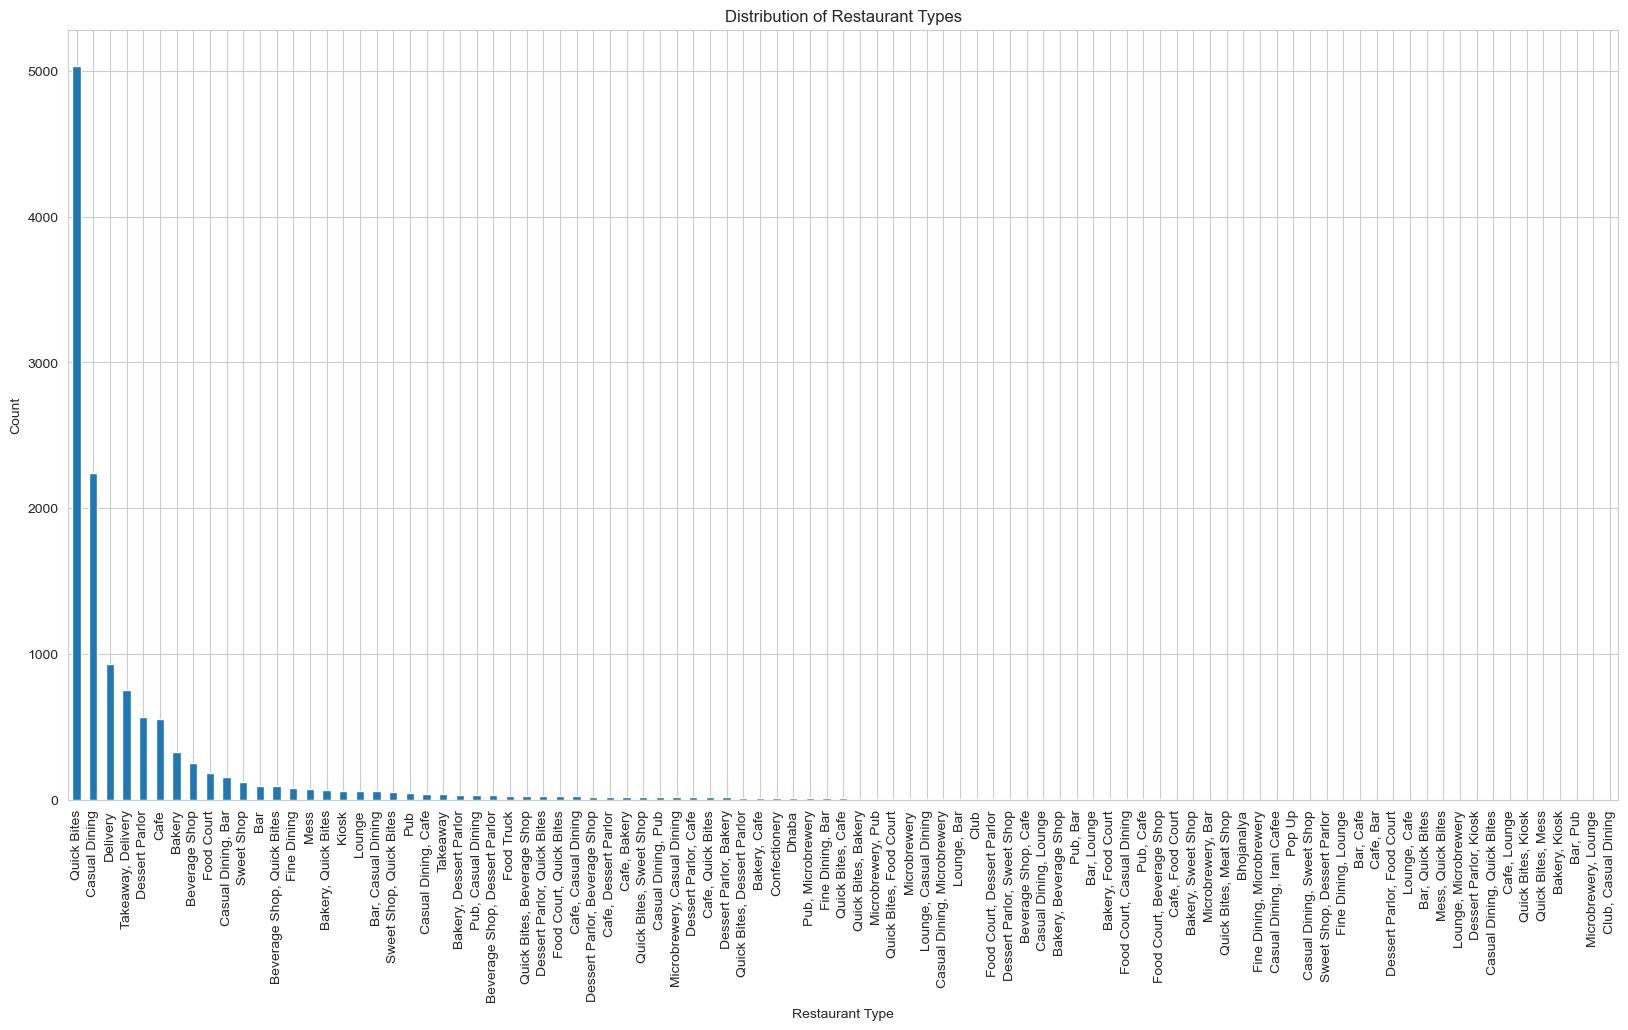

In [31]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the bar chart
data['rest_type'].value_counts().plot(kind='bar')

# Add labels and title
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


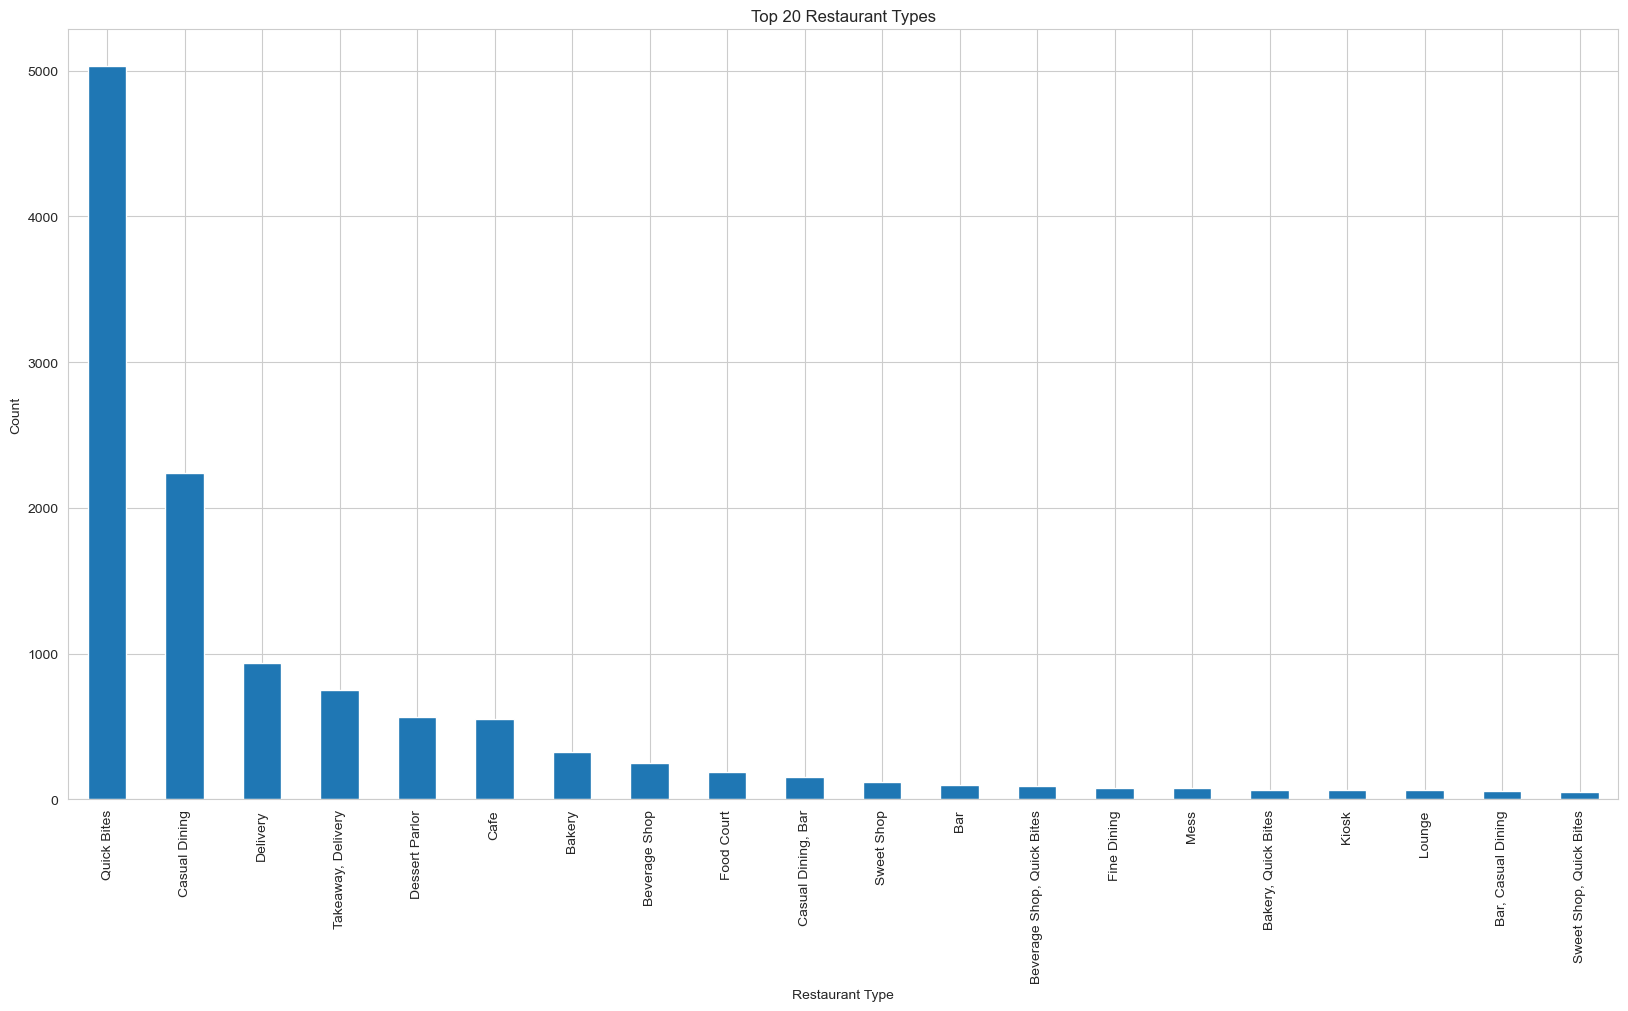

In [32]:
# Get the top 20 restaurant types based on their frequency counts
top_20_rest_types = data['rest_type'].value_counts().head(20)

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the bar chart for the top 20 restaurant types
top_20_rest_types.plot(kind='bar')

# Add labels and title
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.title('Top 20 Restaurant Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


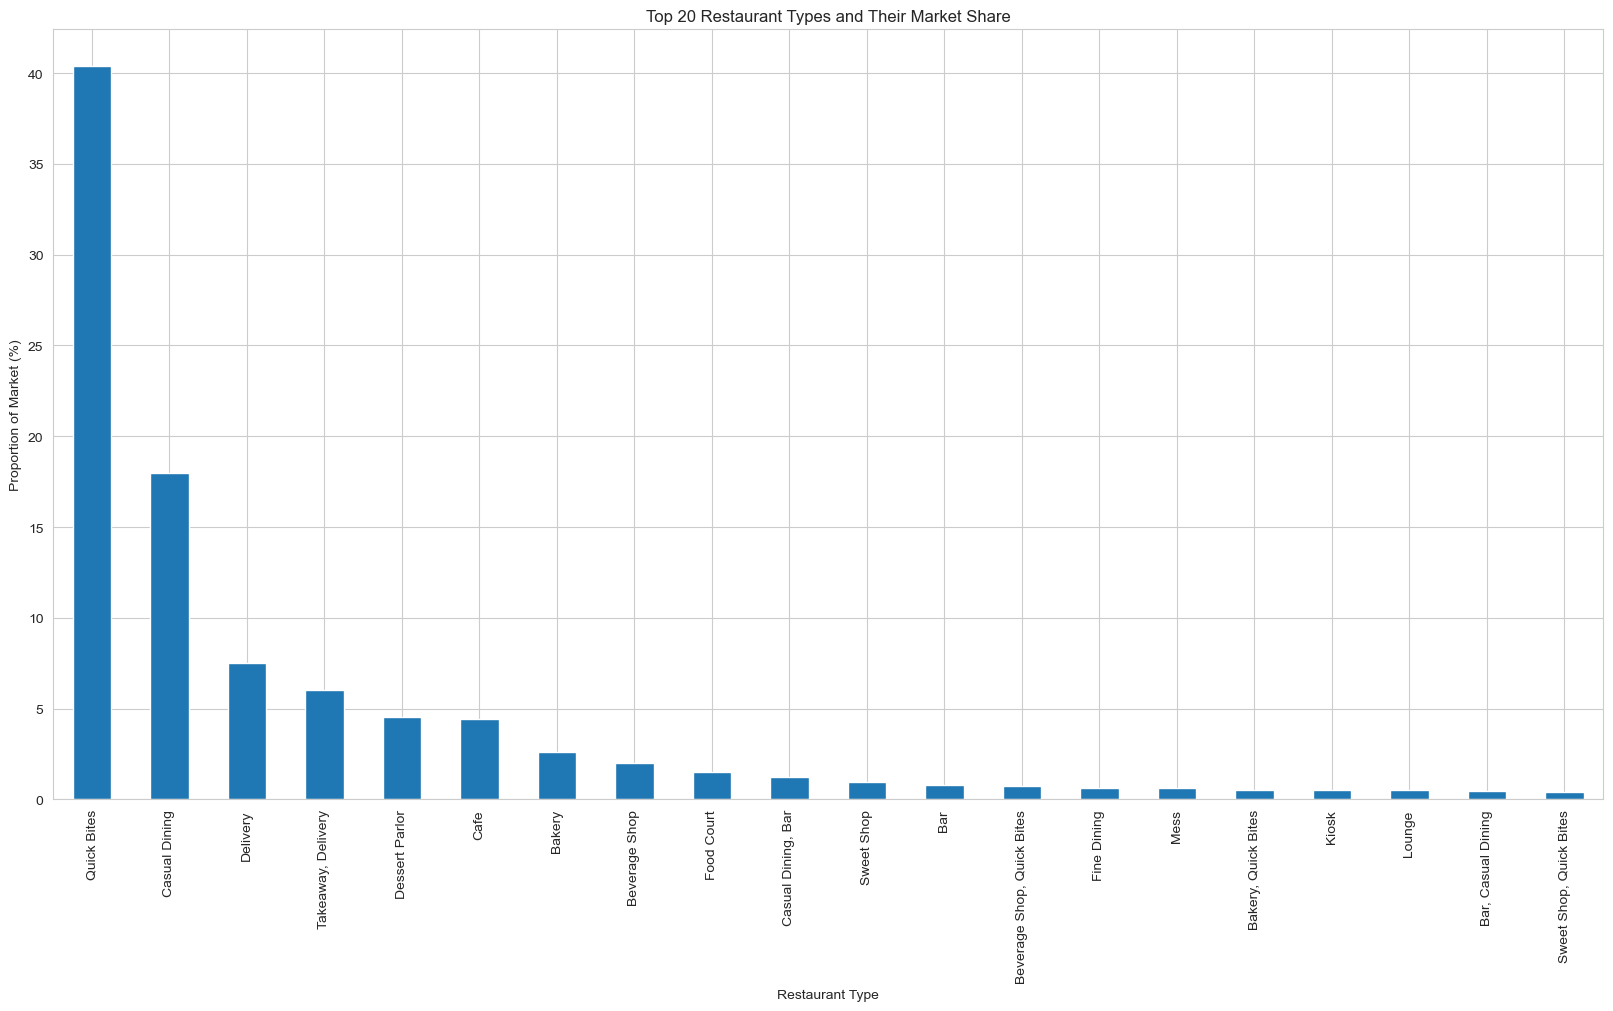

In [33]:
# Calculate the total number of restaurants
total_restaurants = data.shape[0]

# Get the top 20 restaurant types based on their frequency counts
top_20_rest_types = data['rest_type'].value_counts().head(20)

# Calculate the proportions
proportions = (top_20_rest_types / total_restaurants) * 100

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the bar chart for the top 20 restaurant types
proportions.plot(kind='bar')

# Add labels and title
plt.xlabel('Restaurant Type')
plt.ylabel('Proportion of Market (%)')
plt.title('Top 20 Restaurant Types and Their Market Share')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


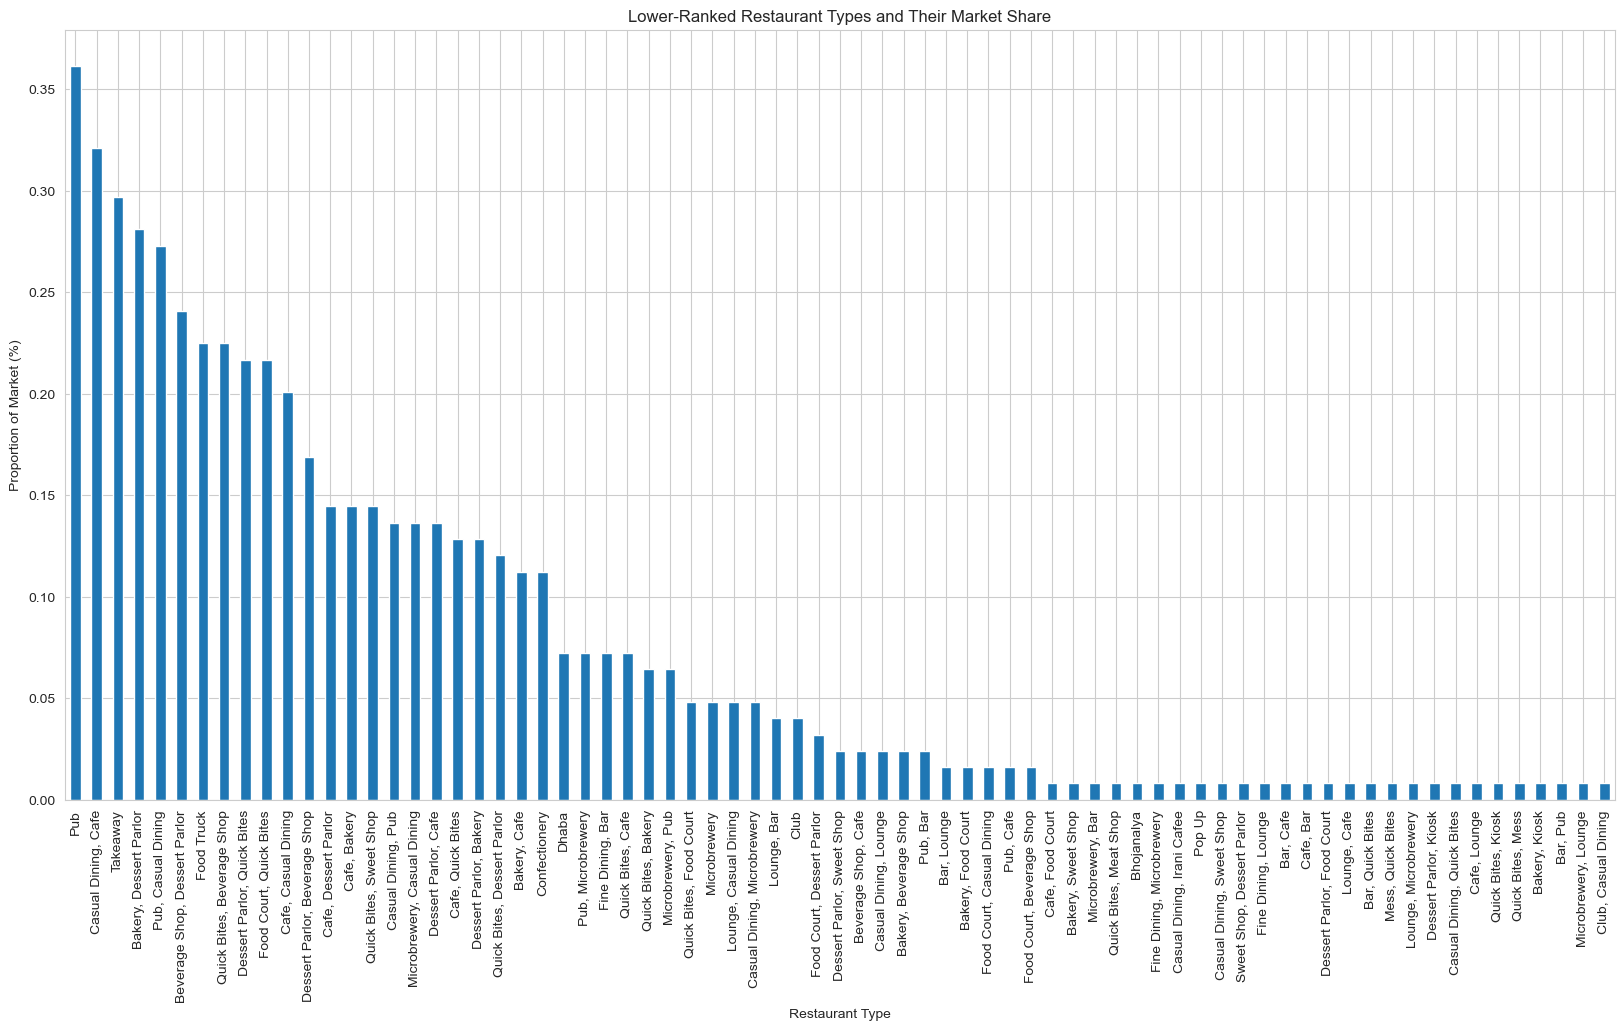

In [34]:
# Get all restaurant types
all_restaurant_types = data['rest_type'].value_counts()

# Calculate the total number of restaurants
total_restaurants = all_restaurant_types.sum()

# Get the lower-ranked restaurant types (excluding the top 20)
lower_ranked_rest_types = all_restaurant_types[20:]

# Calculate the proportions
proportions_lower_ranked = (lower_ranked_rest_types / total_restaurants) * 100

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the bar chart for the lower-ranked restaurant types
proportions_lower_ranked.plot(kind='bar')

# Add labels and title
plt.xlabel('Restaurant Type')
plt.ylabel('Proportion of Market (%)')
plt.title('Lower-Ranked Restaurant Types and Their Market Share')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


#### `Quick bites` are the most popular type of restaurant, making up over `40%` of the market. This category likely includes fast food restaurants, coffee shops, and convenience stores that sell prepared food.
#### `Casual dining` restaurants are the second most popular type, making up about over `15%` of the market. These restaurants typically offer a wider selection of food and drinks than quick bites restaurants, but they are still relatively affordable and casual.
#### `Delivery` and `takeaway` restaurants are becoming increasingly popular, making up a combined `13%` of the market. This trend is likely due to the growing popularity of online food ordering and delivery services.
#### `Other types` of restaurants, such as dessert parlors, cafes, bakeries, beverage shops, food courts, and fine dining establishments, make up the remaining `52%` of the market.

You can dive deeper into what i have did and investigate more and more:
- Consumer preferences: Which we have did alraedy....
- Competition: How many restaurants are competing in each segment?
- Growth potential: Are there any under-served segments with potential for growth?


Market share by type: This refers to the percentage of restaurants in the total market that specialize in each segment.
- Segment size: This indicates the number of restaurants within each segment.
- Market leader: This refers to the cuisine segment with the highest market share or number of restaurants.
- Additionally, you might encounter terms like:

- Niche market: A small, specialized segment with unique needs and preferences.
- Mass market: A large, diverse segment with varied needs and preferences.

----

### Analyzing cost distribution across the market? <a id='question9'></a>

##### When it come to cost analysis we can investigate many many aspects like:
- What is the average cost per cuisine type in our dataset?
- What is the low end high and cuisines interms of price?
- How does the cost vary across different restaurant categories?
- Can we identify any trends or patterns in cost based on geographical location?
- Is there a correlation between the cost of dishes and customer ratings?
- Are there any significant cost differences between restaurants with online order and those who does not offer online order?

In [35]:
# Calculates the average approximate cost for two people ('approx_cost(for two people)') for restaurants that serve North Indian cuisine.
North_Indian_Cusine_prices = data[data['cuisines'].apply(lambda x: "North Indian" in x)]['approx_cost(for two people)'].mean()
Chinese_Cusine_prices = data[data['cuisines'].apply(lambda x: "Chinese" in x)]['approx_cost(for two people)'].mean()
South_Indian_Cusine_prices = data[data['cuisines'].apply(lambda x: "South Indian" in x)]['approx_cost(for two people)'].mean()
Fast_Food_Cusine_prices = data[data['cuisines'].apply(lambda x: "Fast Food" in x)]['approx_cost(for two people)'].mean()
Desserts_Cusine_prices = data[data['cuisines'].apply(lambda x: "Desserts" in x)]['approx_cost(for two people)'].mean()


In [36]:
cost_per_cuisine_type = {"North Indian":North_Indian_Cusine_prices, "Chinese": Chinese_Cusine_prices,"South Indian":South_Indian_Cusine_prices, "Fast Food":Fast_Food_Cusine_prices , "Desserts":Desserts_Cusine_prices }

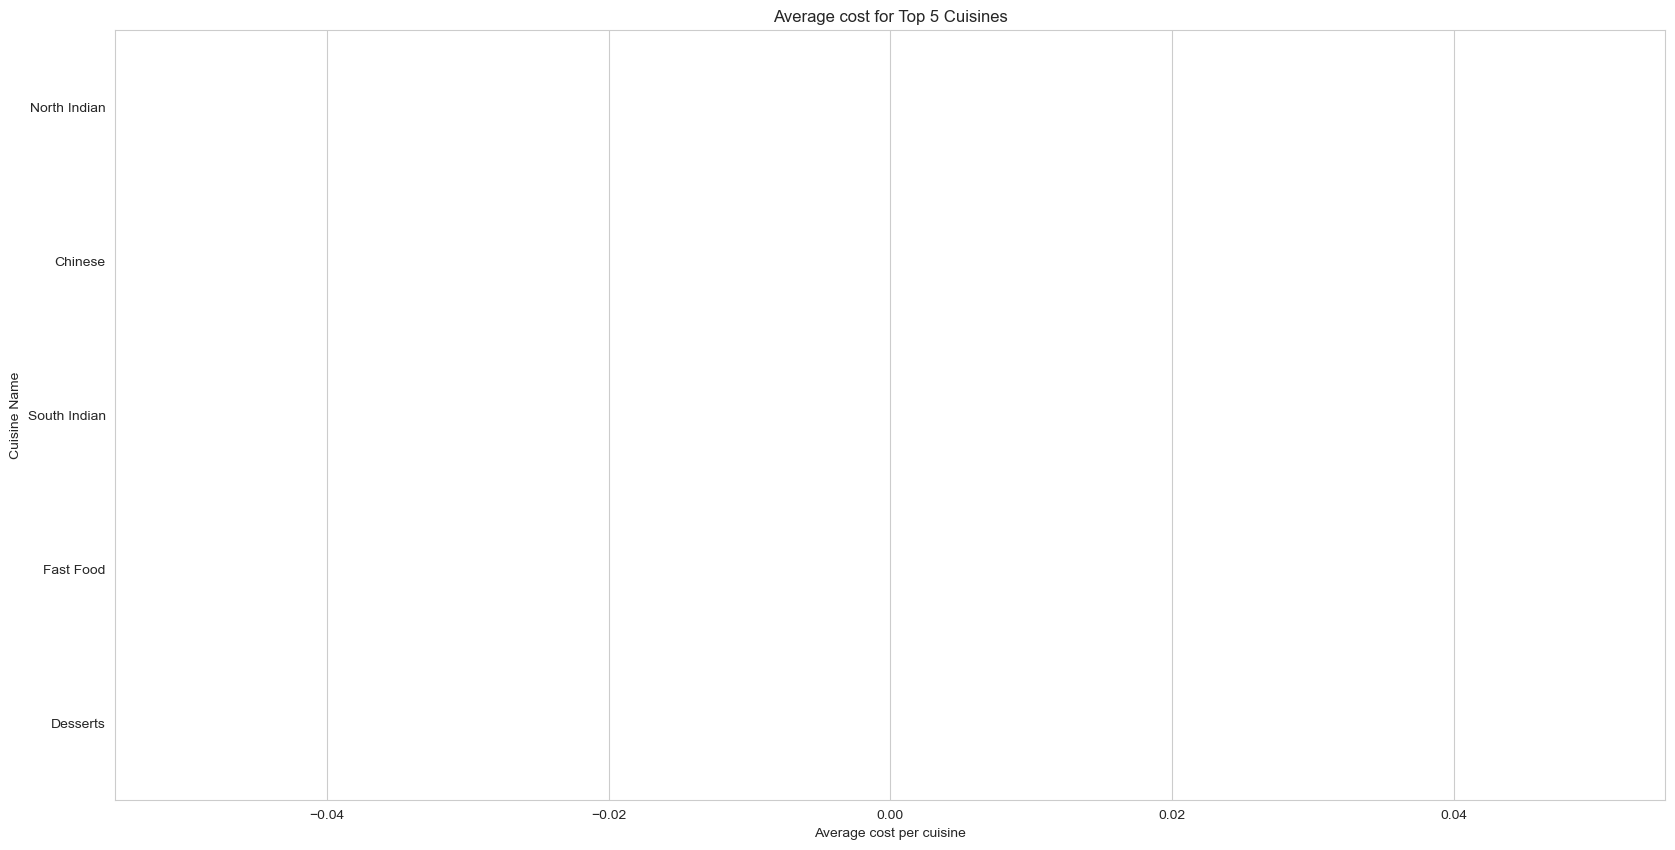

In [37]:
# Creating the bar plot
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.barplot(y=list(cost_per_cuisine_type.keys()), x=list(cost_per_cuisine_type.values()), palette="viridis")
plt.xlabel('Average cost per cuisine')
plt.ylabel('Cuisine Name')
plt.title('Average cost for Top 5 Cuisines')
plt.show()

### The average cost of `North Indian` cuisine is the highest, followed by `Chinese`, `South Indian`, `Fast Food`, and `Desserts`.
### The average cost of `Fast Food` cuisine tends to have the lowest average cost.

**************

### Exploring Affordable Dining Options: How to Find the Best Budget Restaurants in Any Location <a id ='question10'></a>

In [38]:
Resturants_costs = data.groupby(['name','location' ])['approx_cost(for two people)'].agg('mean').reset_index()
Resturants_costs

,name,location,approx_cost(for two people)
0,#FeelTheROLL,Bellandur,200.000000
1,#L-81 Cafe,HSR,400.000000
2,#Vibes Restro,Electronic City,700.000000
3,#refuel,Bannerghatta Road,400.000000
4,'Brahmins' Thatte Idli,Basaveshwara Nagar,100.000000
...,...,...,...
12078,nu.tree,Sarjapur Road,400.000000
12079,nu.tree,Whitefield,400.000000
12080,re:cess - Hilton Bangalore Embassy GolfLinks,Domlur,416.630112
12081,repEAT Hub,Marathahalli,200.000000


In [39]:
def budget_resturant(location,budget):
    budget_resturant=Resturants_costs[(Resturants_costs['approx_cost(for two people)']<=budget) & (Resturants_costs['location']==location)]
    return(budget_resturant['name'])

In [40]:
budget_resturant('HSR',450)

1                           #L-81 Cafe
73                     56 Bhoga Sweets
74                       5th Main Cafe
98                                90's
107      99 Variety Dosa and Pav Bhaji
                     ...              
11989                        Yummy Pot
12008                 Zaikedar Kitchen
12048                        Zing Roll
12051                Ziyan's Cafe 27th
12062                       de Ranthal
Name: name, Length: 449, dtype: object

**************

### Identifying Foodie Hotspots: Where Are the Popular Dining Destinations?<a id= "question11"></a>

c:\Users\enay9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


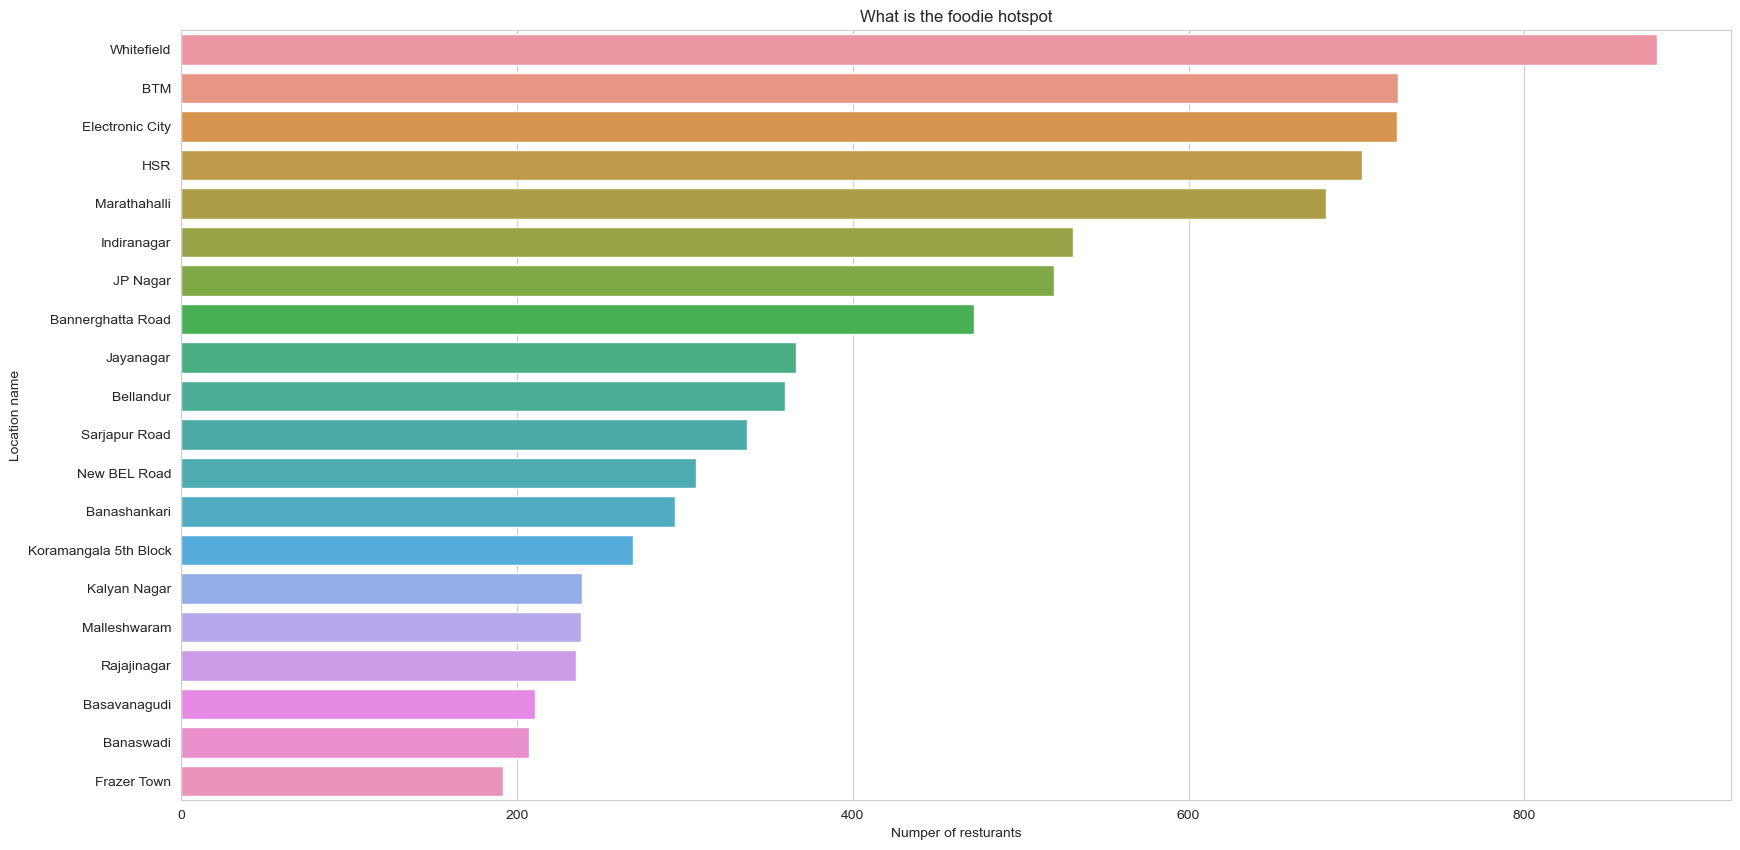

In [41]:
plt.figure(figsize=(20,10))
locations = data['location'].value_counts()[:20]
sns.barplot(locations,locations.index)
plt.xlabel('Numper of resturants')
plt.ylabel('Location name')
plt.title('What is the foodie hotspot')
plt.show()


1. **Whitefield Emergence:** `Whitefield` emerges as the premier foodie hotspot in the city, boasting `over 800` restaurants. This dominance can be attributed to factors such as the abundance of dining options, a wide variety of cuisines, and possibly the affordability of eateries in the area.

2. **Neighborhood Disparities:** The number of restaurants varies significantly across different neighborhoods. For instance, while `Whitefield` flourishes with `over 800` establishments, `Frazer` Town falls behind with fewer than `200`. This variation likely results from factors like neighborhood size, resident demographics, and zoning regulations.


---

### We can explore more quests with interesting questions like:
- Which are the most common cuisines in each locations?
- Which are the most popular cuisines in a particular city?
- Which are the most popular casual dining restaurant chains?
- Top quick bites restaurant chains in a particular city?
- Top Cafes of in a particular city?
- Wordcloud of dishes liked by cuisines?
- Does the demography of an area matters?
- Does location of a particular type of restaurant also depends on the people living in that area?
- Does the theme of the restaurant matters?
- Is a food chain category restaurant likely to have more customers than its counterpart?
- Are any neighborhoods similar based on the type of food?
- Is a particular neighborhood famous for its own kind of food?
- If two neighborhoods are similar does that mean these are related or particular group of people live in the neighborhood or these are the places to it?
- What kind of food is more popular in a locality?

-----

### EDA Informing our model decisions 

### Feature enginnering
- Upon analysis, we've identified certain features that could provide valuable insights to our model, potentially enhancing its predictive capability.

#### Cuisines Weights (cuisines_weights):Aggregates the quality/importance of cuisines offered by each restaurant by summing up the counts of individual cuisines.

In [42]:
# Iterate over each list of cuisines in data["cuisines"]
for i, cuisines_list in enumerate(data["cuisines"]):
    # Initialize a new list to store the counts
    counts_list = []
    # Iterate over each cuisine in the current list
    for cuisine in cuisines_list:
        # Find the corresponding count from common_cuisines_df
        count = common_cuisines_df.loc[common_cuisines_df["Cuisine"] == cuisine.strip(), "Count"].values
        # If the cuisine is found in common_cuisines_df, append its count to counts_list
        if len(count) > 0:
            counts_list.append(count[0])
        else:
            # If the cuisine is not found, append a default value (e.g., 0)
            counts_list.append(0)
    # Calculate the sum of counts for the current list of cuisines
    sum_counts = sum(counts_list)
    # Replace the original list of cuisines with the sum of counts
    data.at[i, "cuisines_weights"] = sum_counts



data["cuisines_weights"] = data["cuisines_weights"]

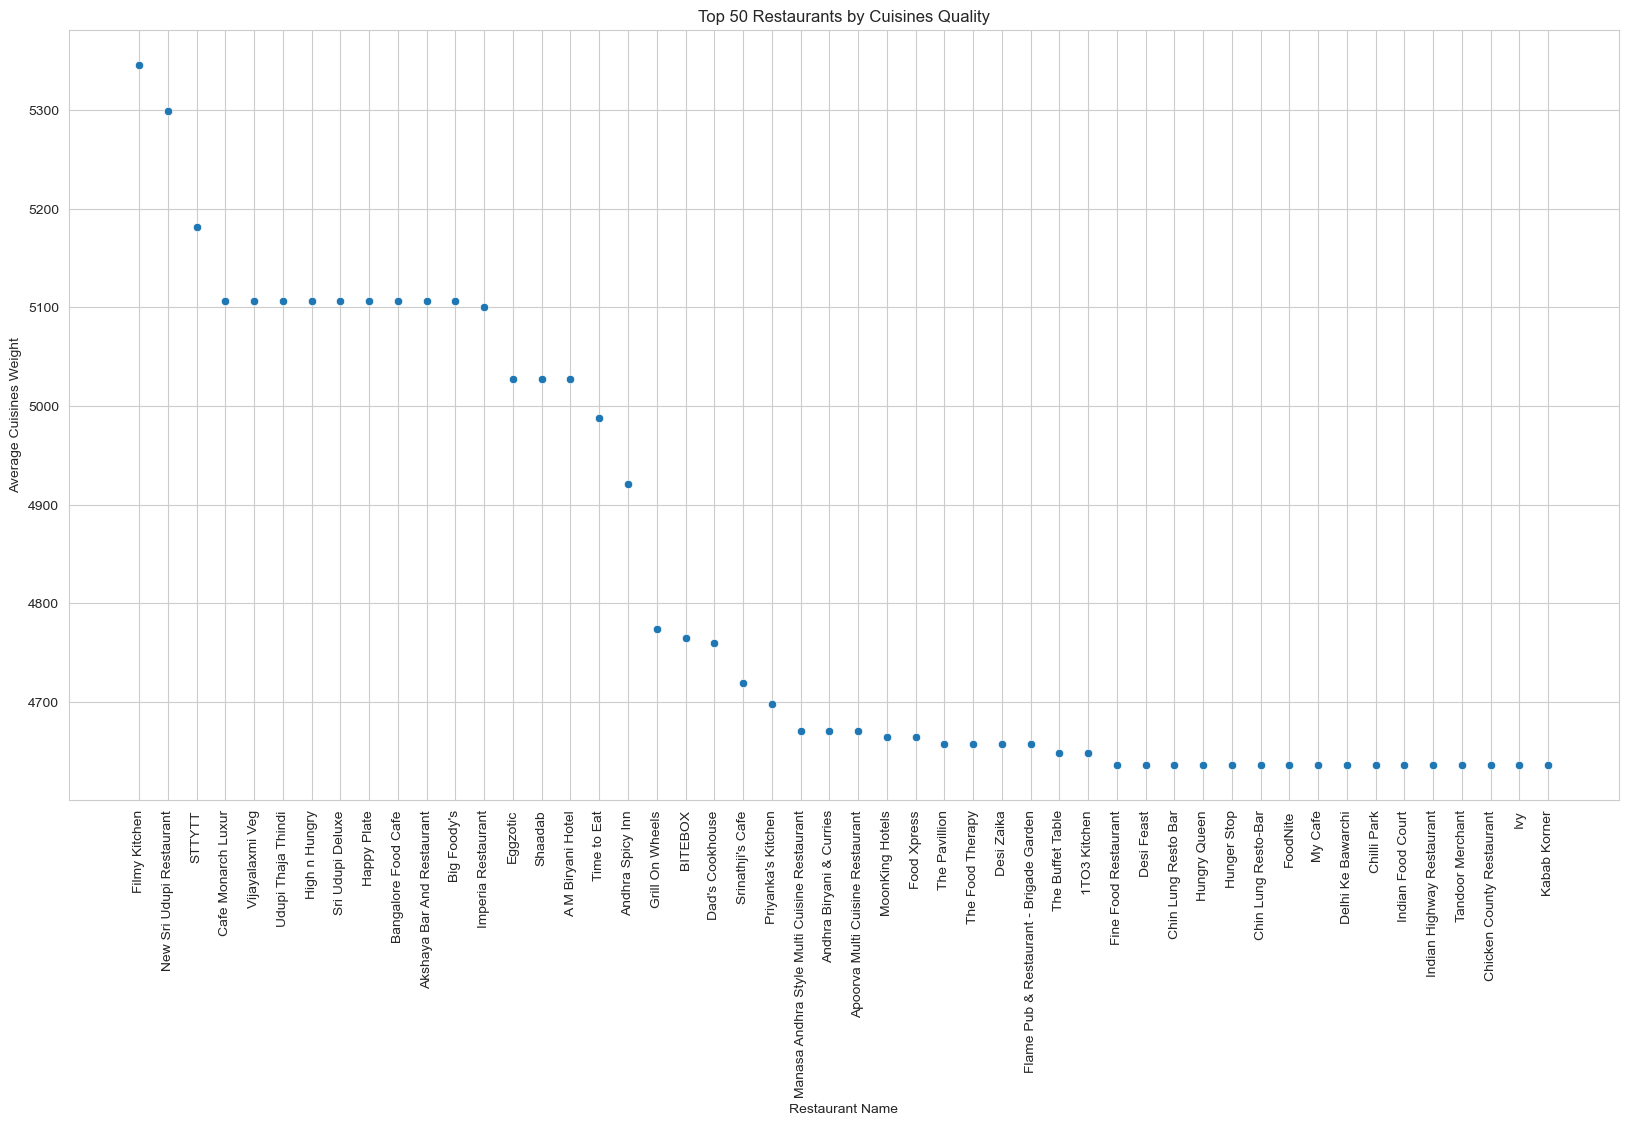

In [43]:
# Calculate the average cuisines weights for each restaurant
resturants_cuisines_Quality = data.groupby('name')['cuisines_weights'].mean()
resturants_cuisines_Quality= resturants_cuisines_Quality.sort_values(ascending=False)
# Select the first 20 restaurants
top_50_restaurants = resturants_cuisines_Quality.head(50)

# Create a scatterplot
plt.figure(figsize=(20, 10))
sns.scatterplot(data=top_50_restaurants, x=top_50_restaurants.index, y=top_50_restaurants.values)

# Add labels and a title
plt.xlabel("Restaurant Name")
plt.ylabel("Average Cuisines Weight")
plt.title("Top 50 Restaurants by Cuisines Quality")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


#### Restaurant Type Market Share (rest_type_market_share): Represents the market presence of each restaurant type by calculating its percentage share out of the total number of restaurants.

In [44]:
# Calculate the total number of restaurants
total_restaurants = data.shape[0]

# Calculate the market representation for each restaurant type
data['rest_type_market_share'] = (data['rest_type'].map(data['rest_type'].value_counts()) / total_restaurants) * 100

-----

In [45]:
# Saveing Our prepared data to a CSV file named "Restaurants.csv" without including the index.
data = data.reset_index(drop=True)  # Reset index without adding it as a column
data.to_csv("Restaurants.csv", index=False)  # Save to CSV without including the index

---

## Grateful for your time going through this kernel! 🙌🔍 Any feedback or improvements are welcome!